You are a data scientist working for a healthcare company, and you have been tasked with creating a 
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been 
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes 
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: 
Your goal is to create a decision tree to predict whether a patient has diabetes based on the other 
variables. Here are the steps you can follow:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_error, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
df = pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=768, step=1)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [15]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [16]:
df.corr("pearson")

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [17]:
df.corr("spearman")

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.130734       0.185127      -0.085222   
Glucose                      0.130734  1.000000       0.235191       0.060022   
BloodPressure                0.185127  0.235191       1.000000       0.126486   
SkinThickness               -0.085222  0.060022       0.126486       1.000000   
Insulin                     -0.126723  0.213206      -0.006771       0.541000   
BMI                          0.000132  0.231141       0.292870       0.443615   
DiabetesPedigreeFunction    -0.043242  0.091293       0.030046       0.180390   
Age                          0.607216  0.285045       0.350895      -0.066795   
Outcome                      0.198689  0.475776       0.142921       0.089728   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.126723  0.000132                 -0.043242   
Glucose                   0.213206  0.231141                  0.091293   
BloodPressure            -0.006771  0.292870                  0.030046   
SkinThickness             0.541000  0.443615                  0.180390   
Insulin                   1.000000  0.192726                  0.221150   
BMI                       0.192726  1.000000                  0.141192   
DiabetesPedigreeFunction  0.221150  0.141192                  1.000000   
Age                      -0.114213  0.131186                  0.042909   
Outcome                   0.066472  0.309707                  0.175353   

                               Age   Outcome  
Pregnancies               0.607216  0.198689  
Glucose                   0.285045  0.475776  
BloodPressure             0.350895  0.142921  
SkinThickness            -0.066795  0.089728  
Insulin                  -0.114213  0.066472  
BMI                       0.131186  0.309707  
DiabetesPedigreeFunction  0.042909  0.175353  
Age                       1.000000  0.309040  
Outcome                   0.309040  1.000000

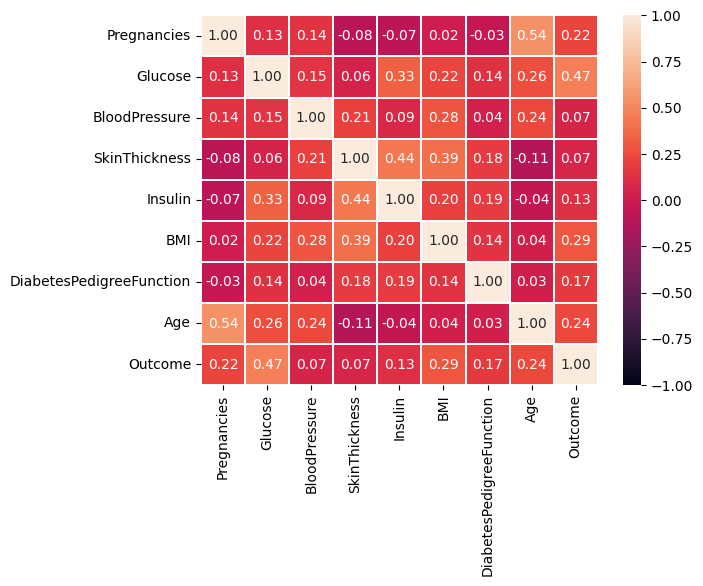

In [18]:
sns.heatmap(df.corr(), annot=True, fmt="2.2f", linewidths= 0.2, vmin= -1, vmax= 1)
plt.show()

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

[]

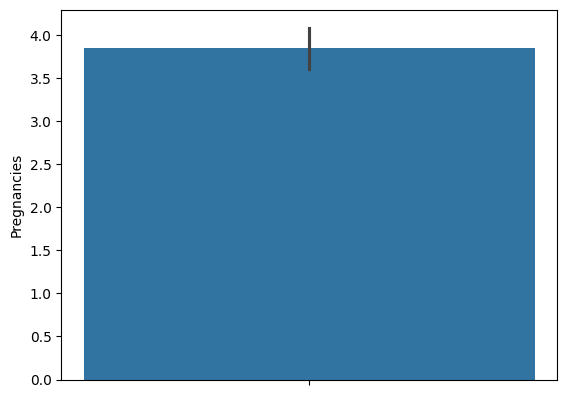

In [21]:
sns.barplot(df, y = "Pregnancies")
plt.plot()

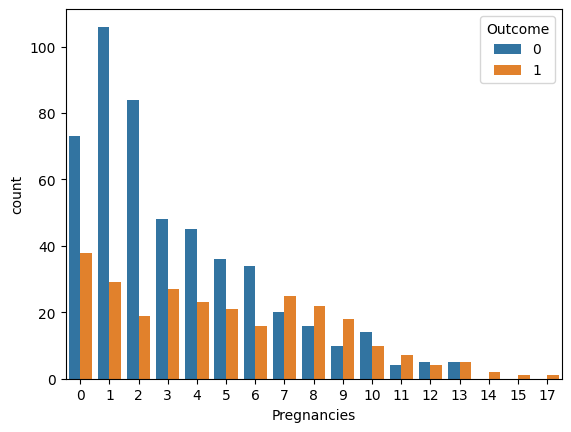

In [22]:
sns.countplot(df, x = "Pregnancies", hue = "Outcome")
plt.show()

In [23]:
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' ,'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'

('Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome')

In [24]:
df["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [25]:
df["BloodPressure"].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [26]:
df["SkinThickness"].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [27]:
df["Insulin"].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [28]:
df["BMI"].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [29]:
df["DiabetesPedigreeFunction"].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [30]:
df["Age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [31]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

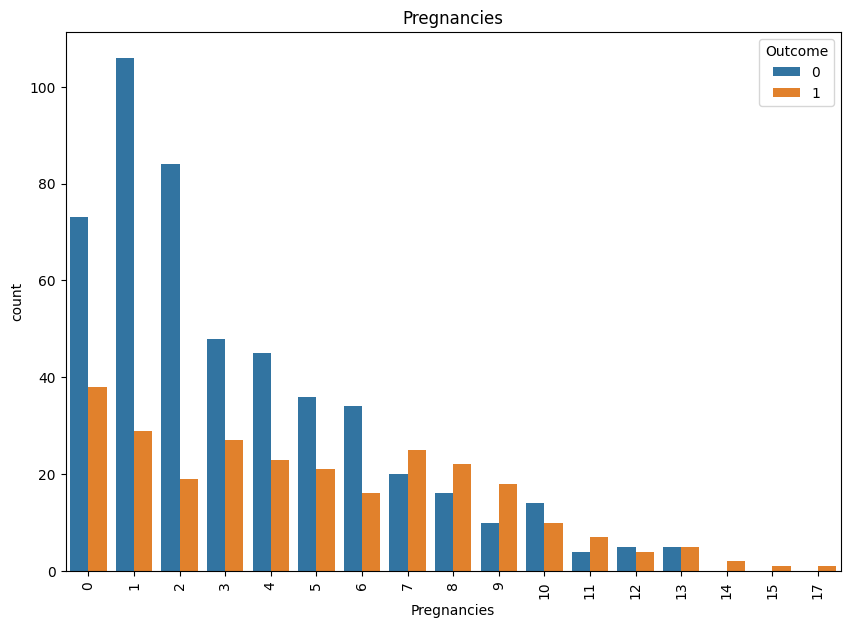

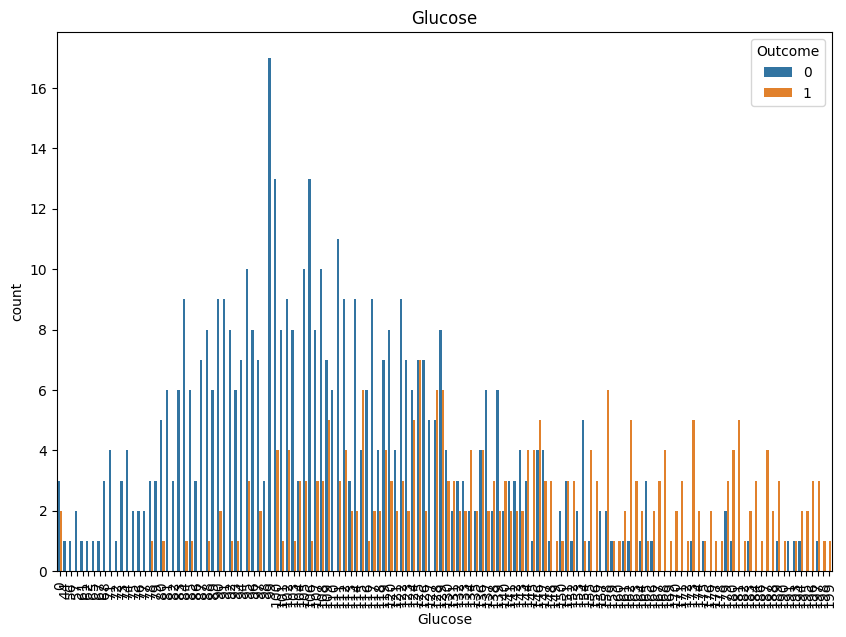

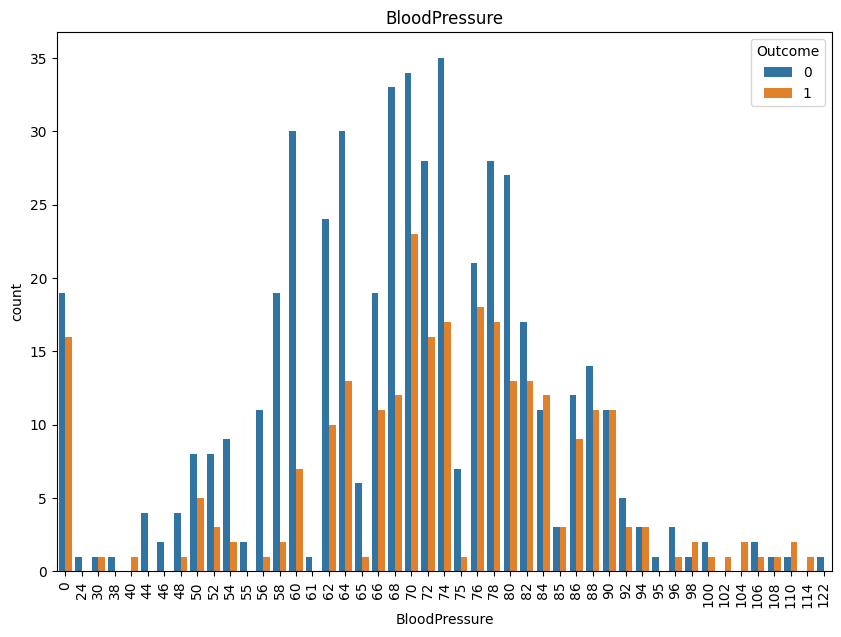

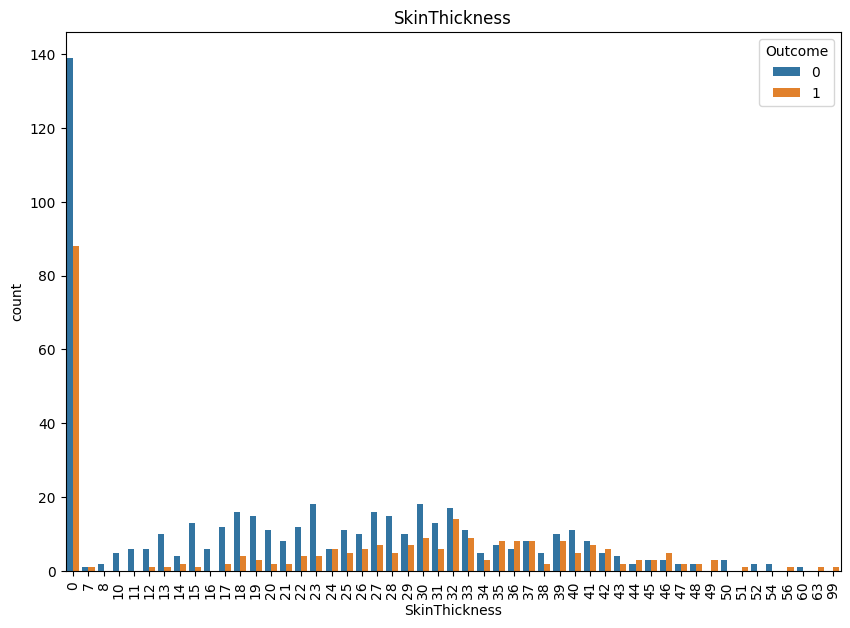

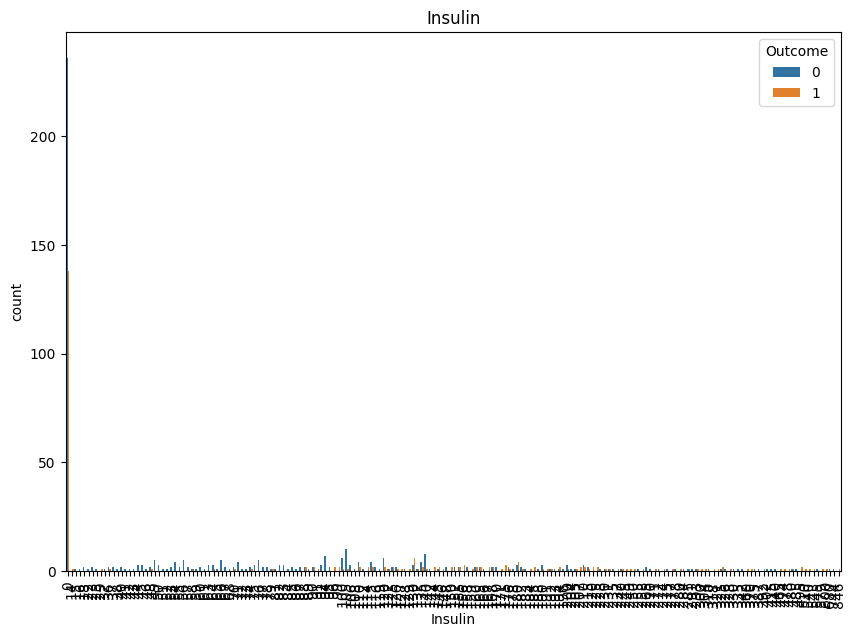

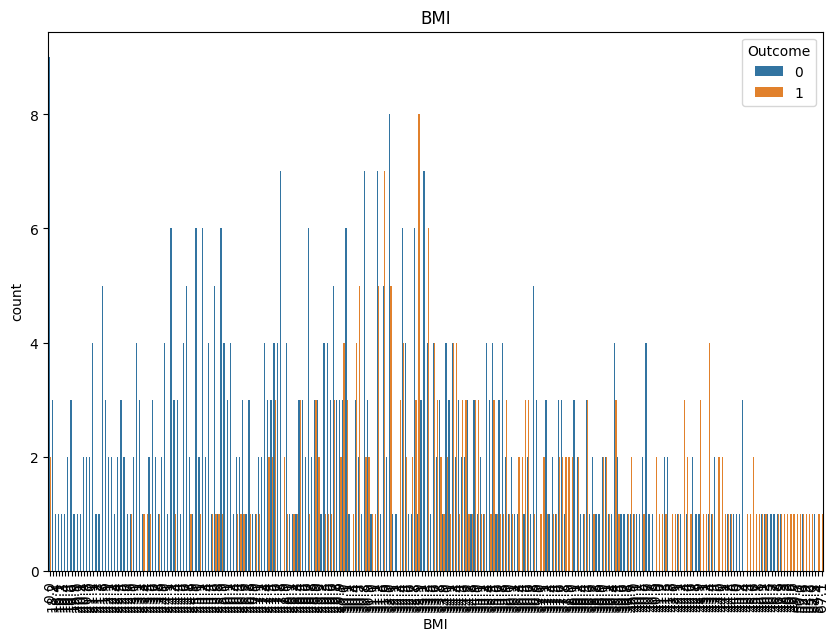

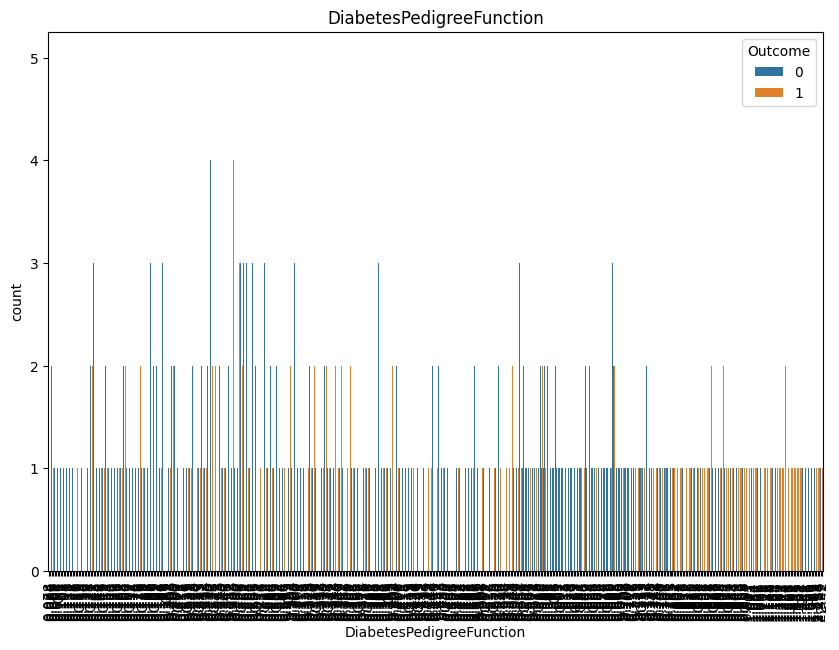

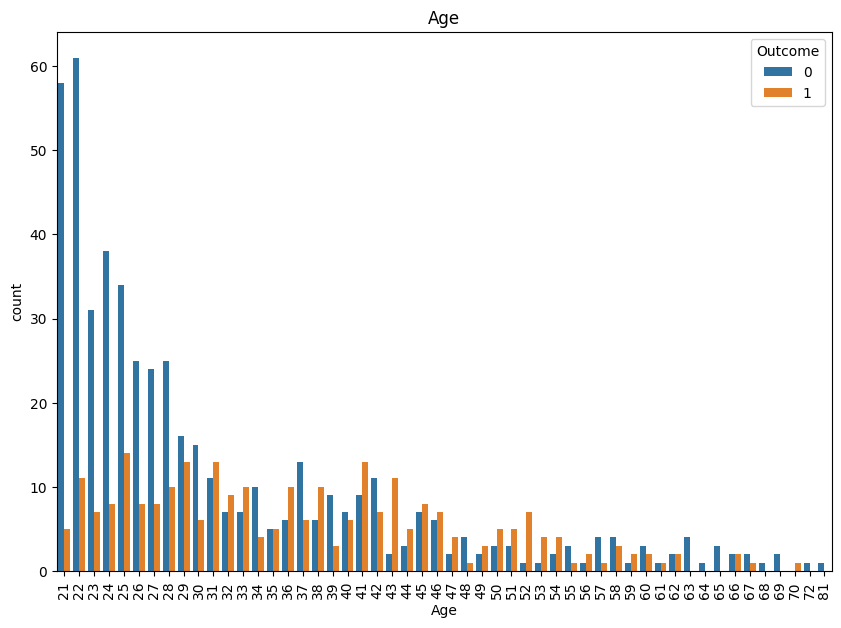

<Figure size 640x480 with 0 Axes>

In [33]:
def countplot(data, columns):
    for i in columns :
        plt.figure(figsize=(10,7))
        plt.title(i)
        sns.countplot(data, x = i, hue ="Outcome")
        plt.xticks(rotation=90)
        plt.show()
    plt.tight_layout()

countplot(df,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

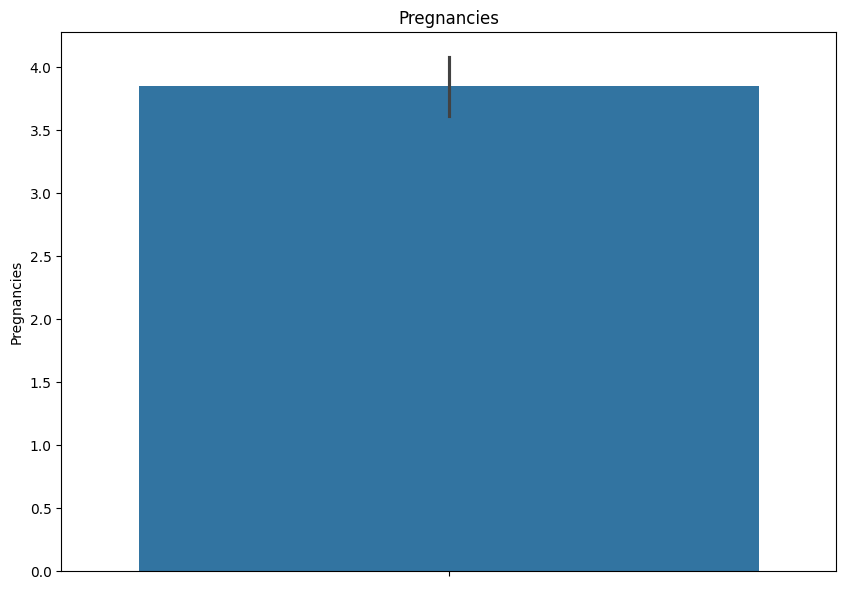

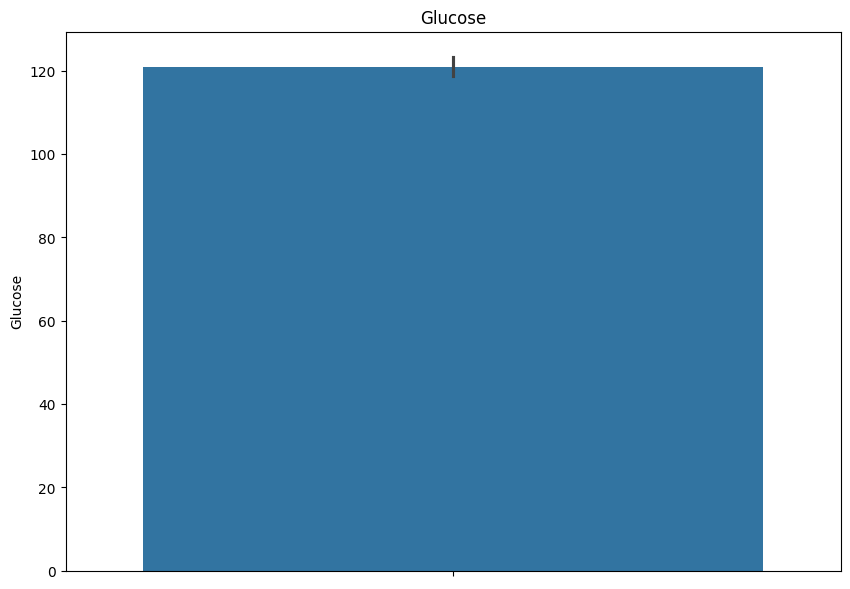

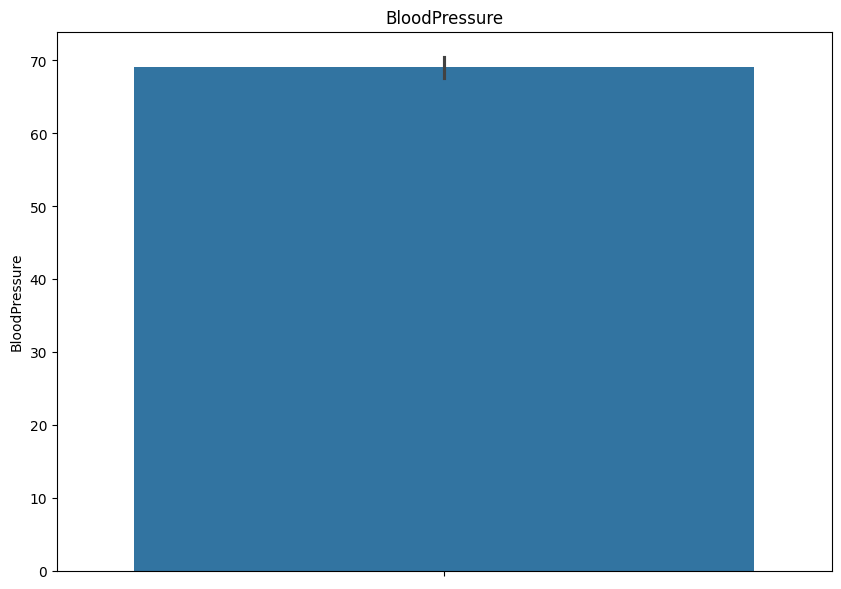

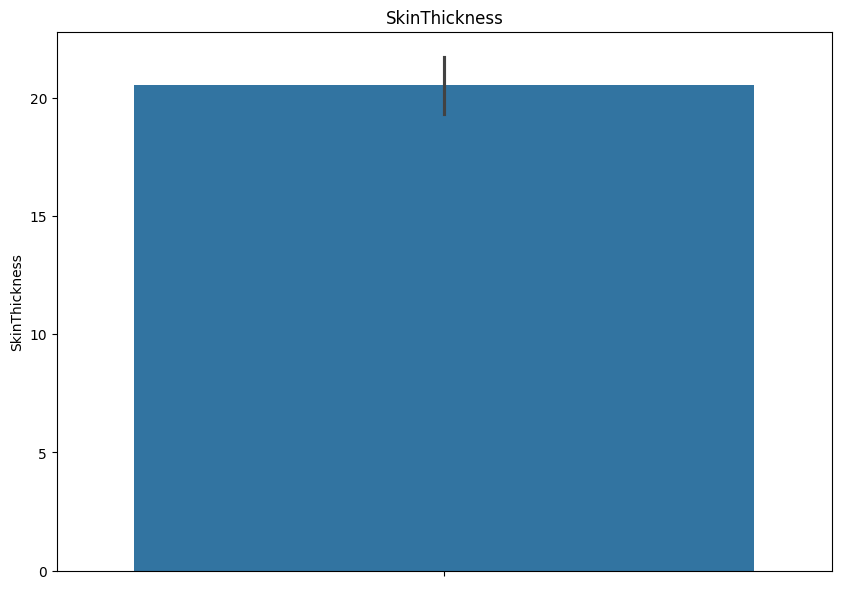

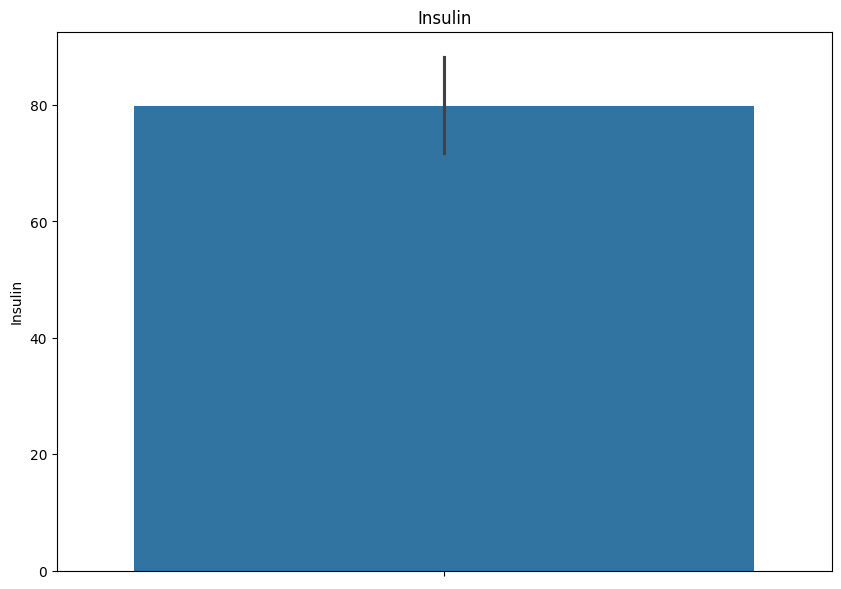

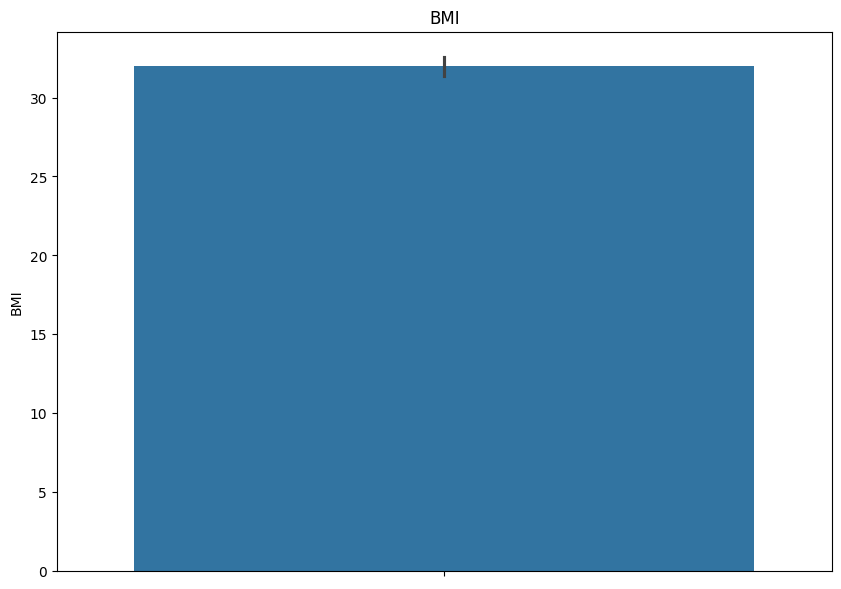

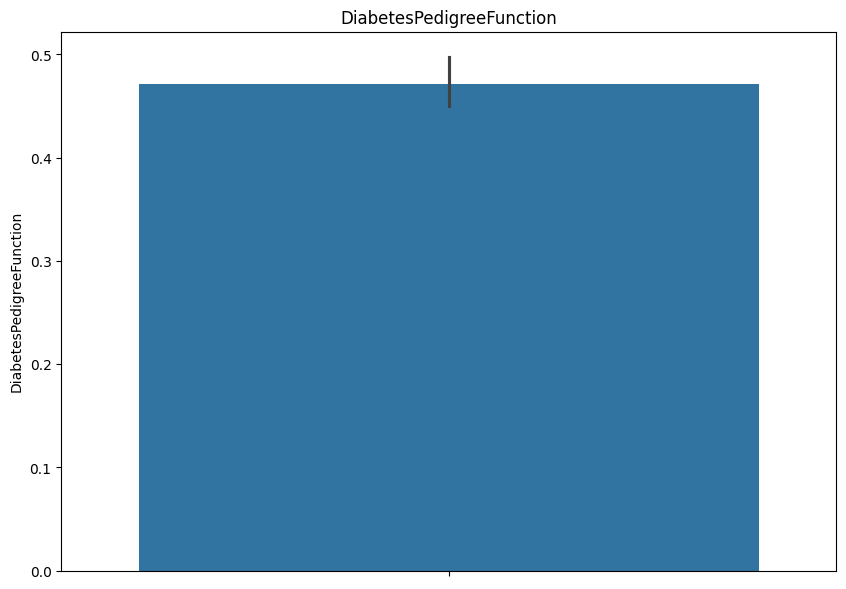

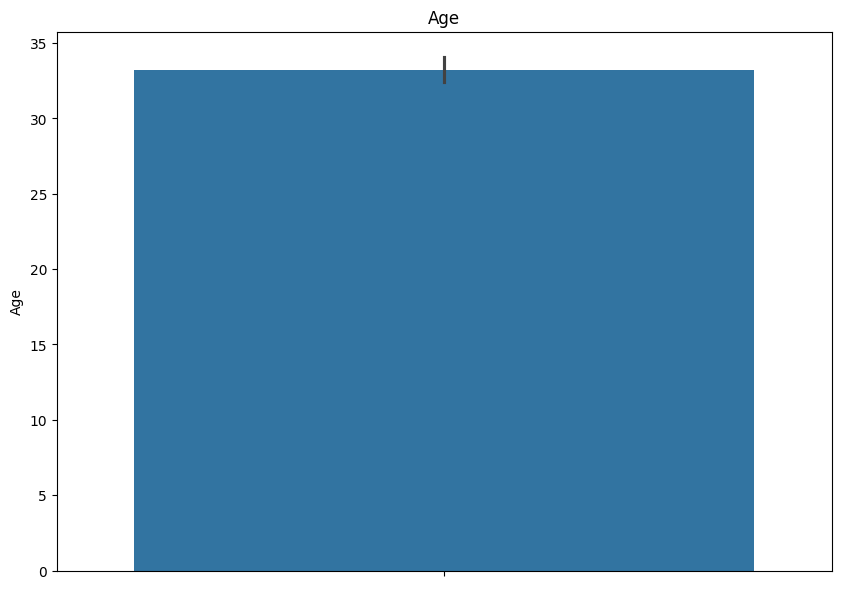

<Figure size 640x480 with 0 Axes>

In [34]:
def barplot(data, columns):
    for i in columns :
        plt.figure(figsize=(10,7))
        plt.title(i)
        sns.barplot(data, y = i)
        plt.xticks(rotation=90)
        plt.show()
    plt.tight_layout()

barplot(df,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

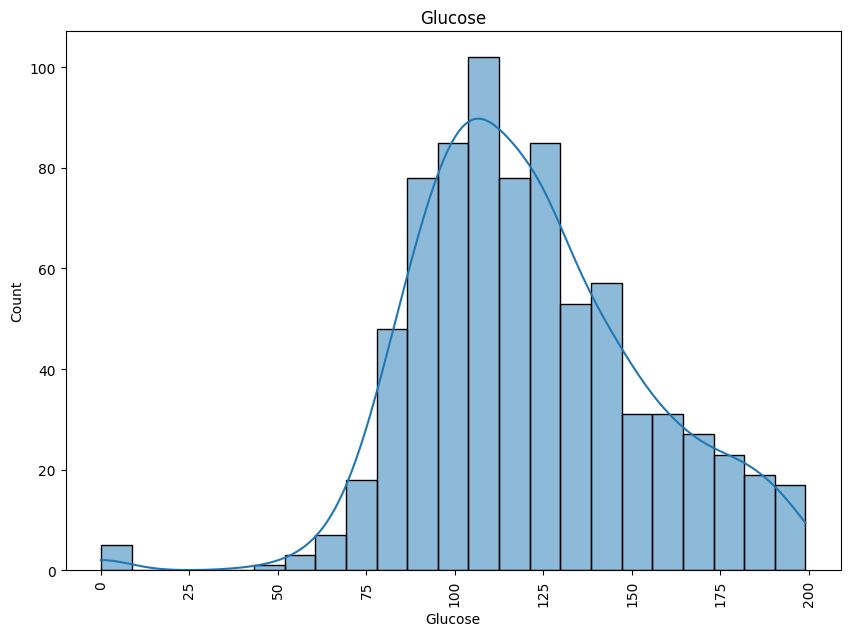

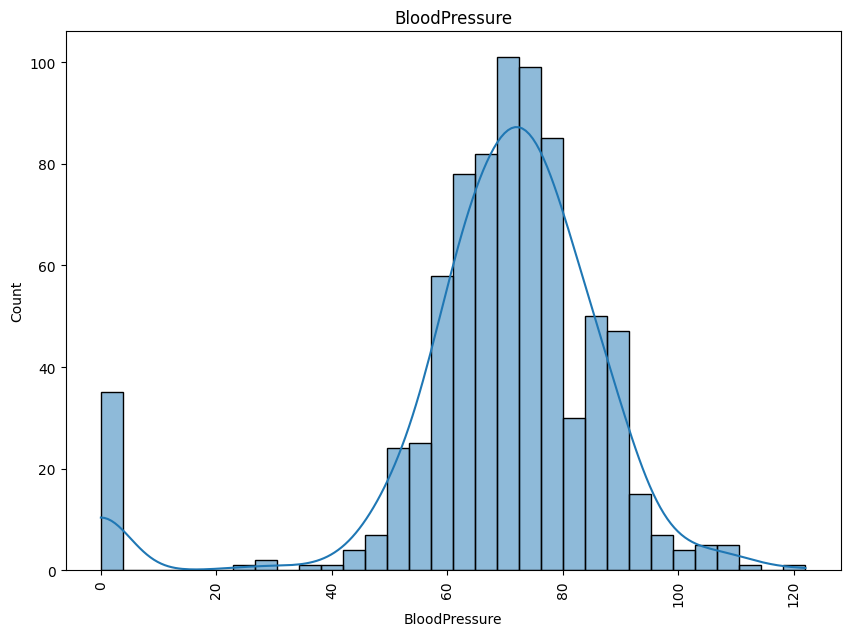

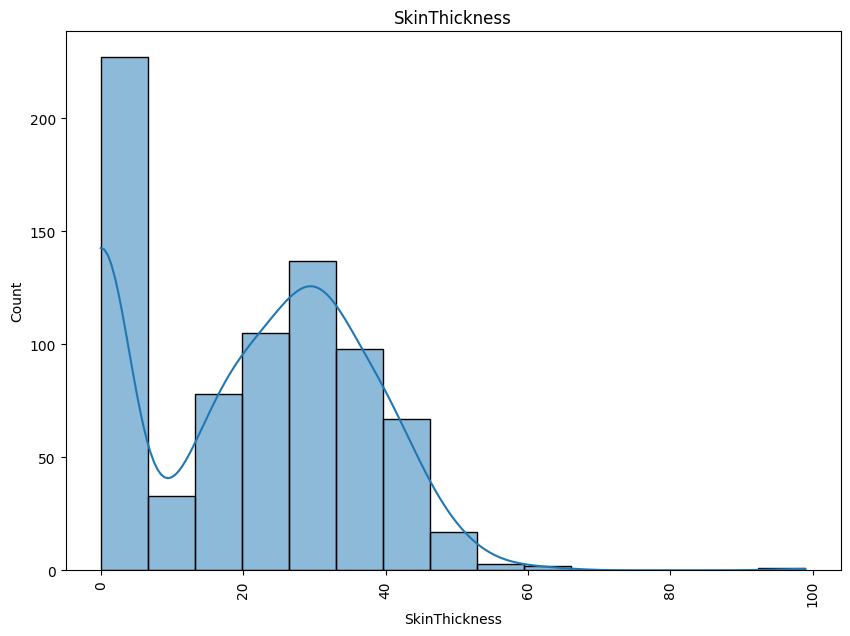

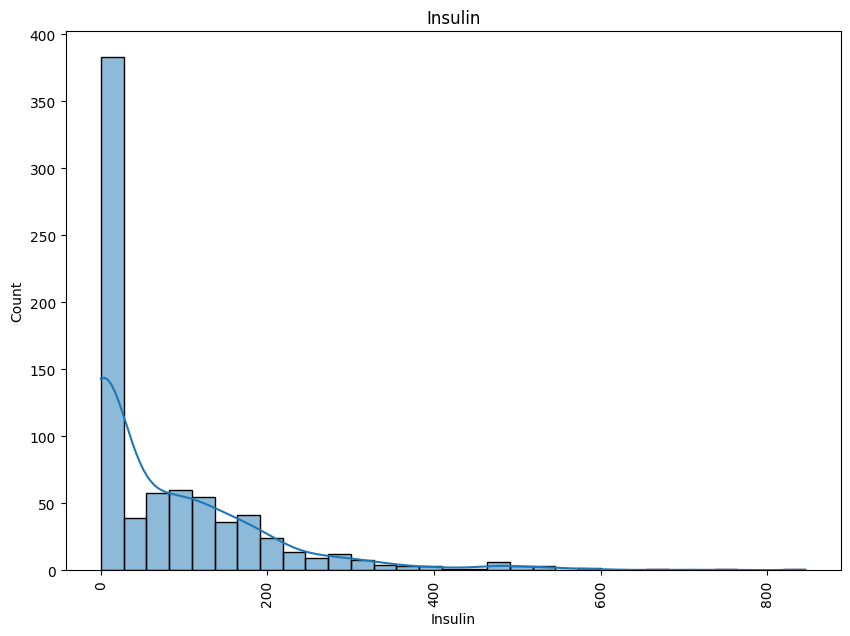

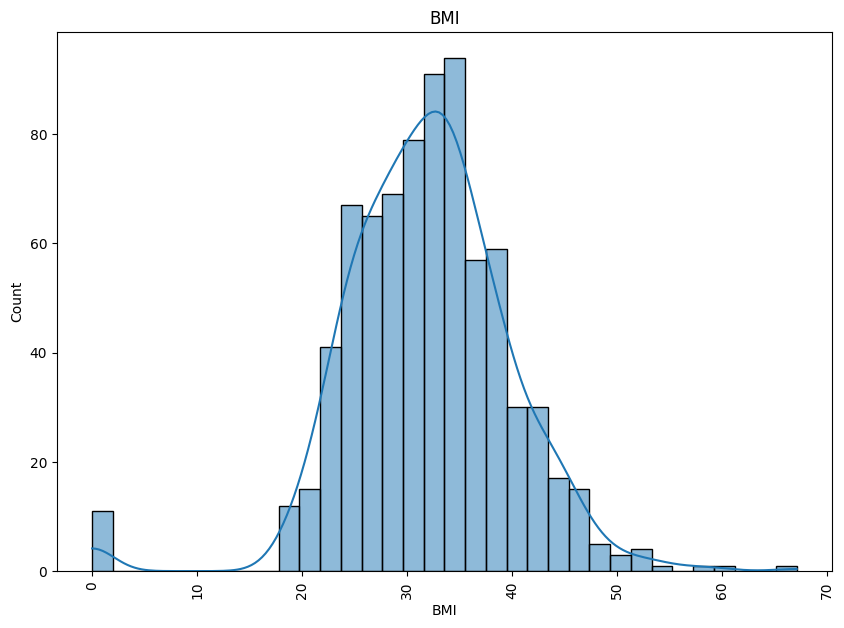

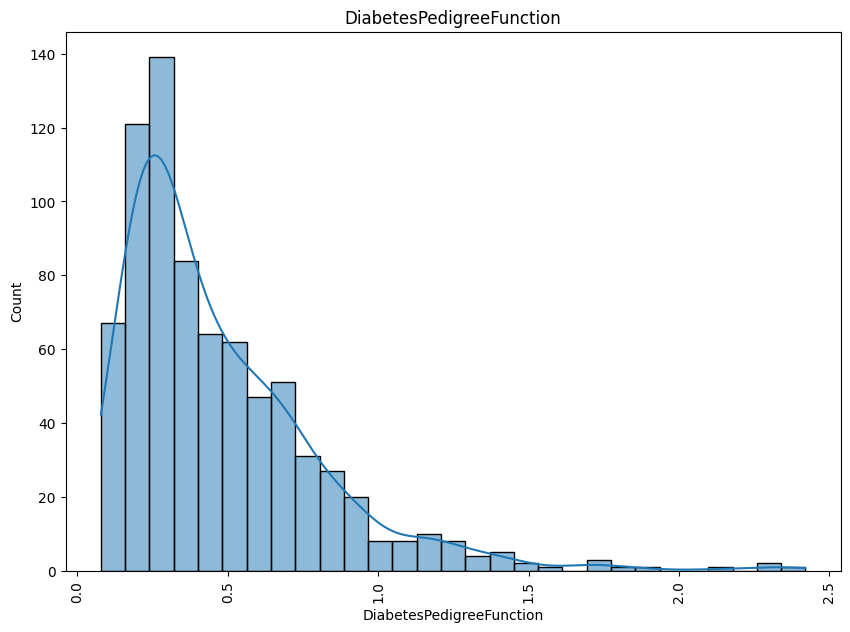

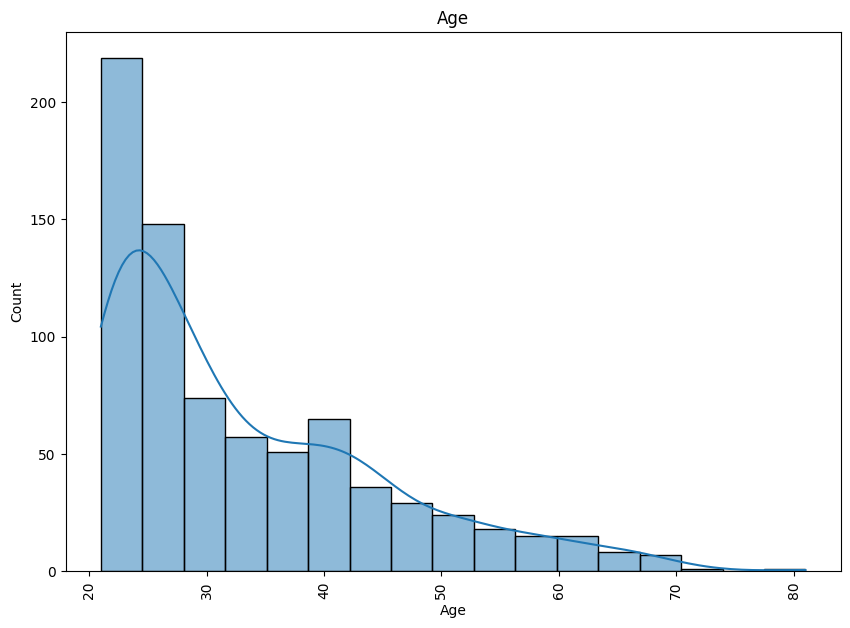

<Figure size 640x480 with 0 Axes>

In [35]:
def histplot(data, columns):
    for i in columns :
        plt.figure(figsize=(10,7))
        plt.title(i)
        sns.histplot(data, x = i, kde= True) 
        plt.xticks(rotation=90)
        plt.show()
    plt.tight_layout()

histplot(df,['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [36]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

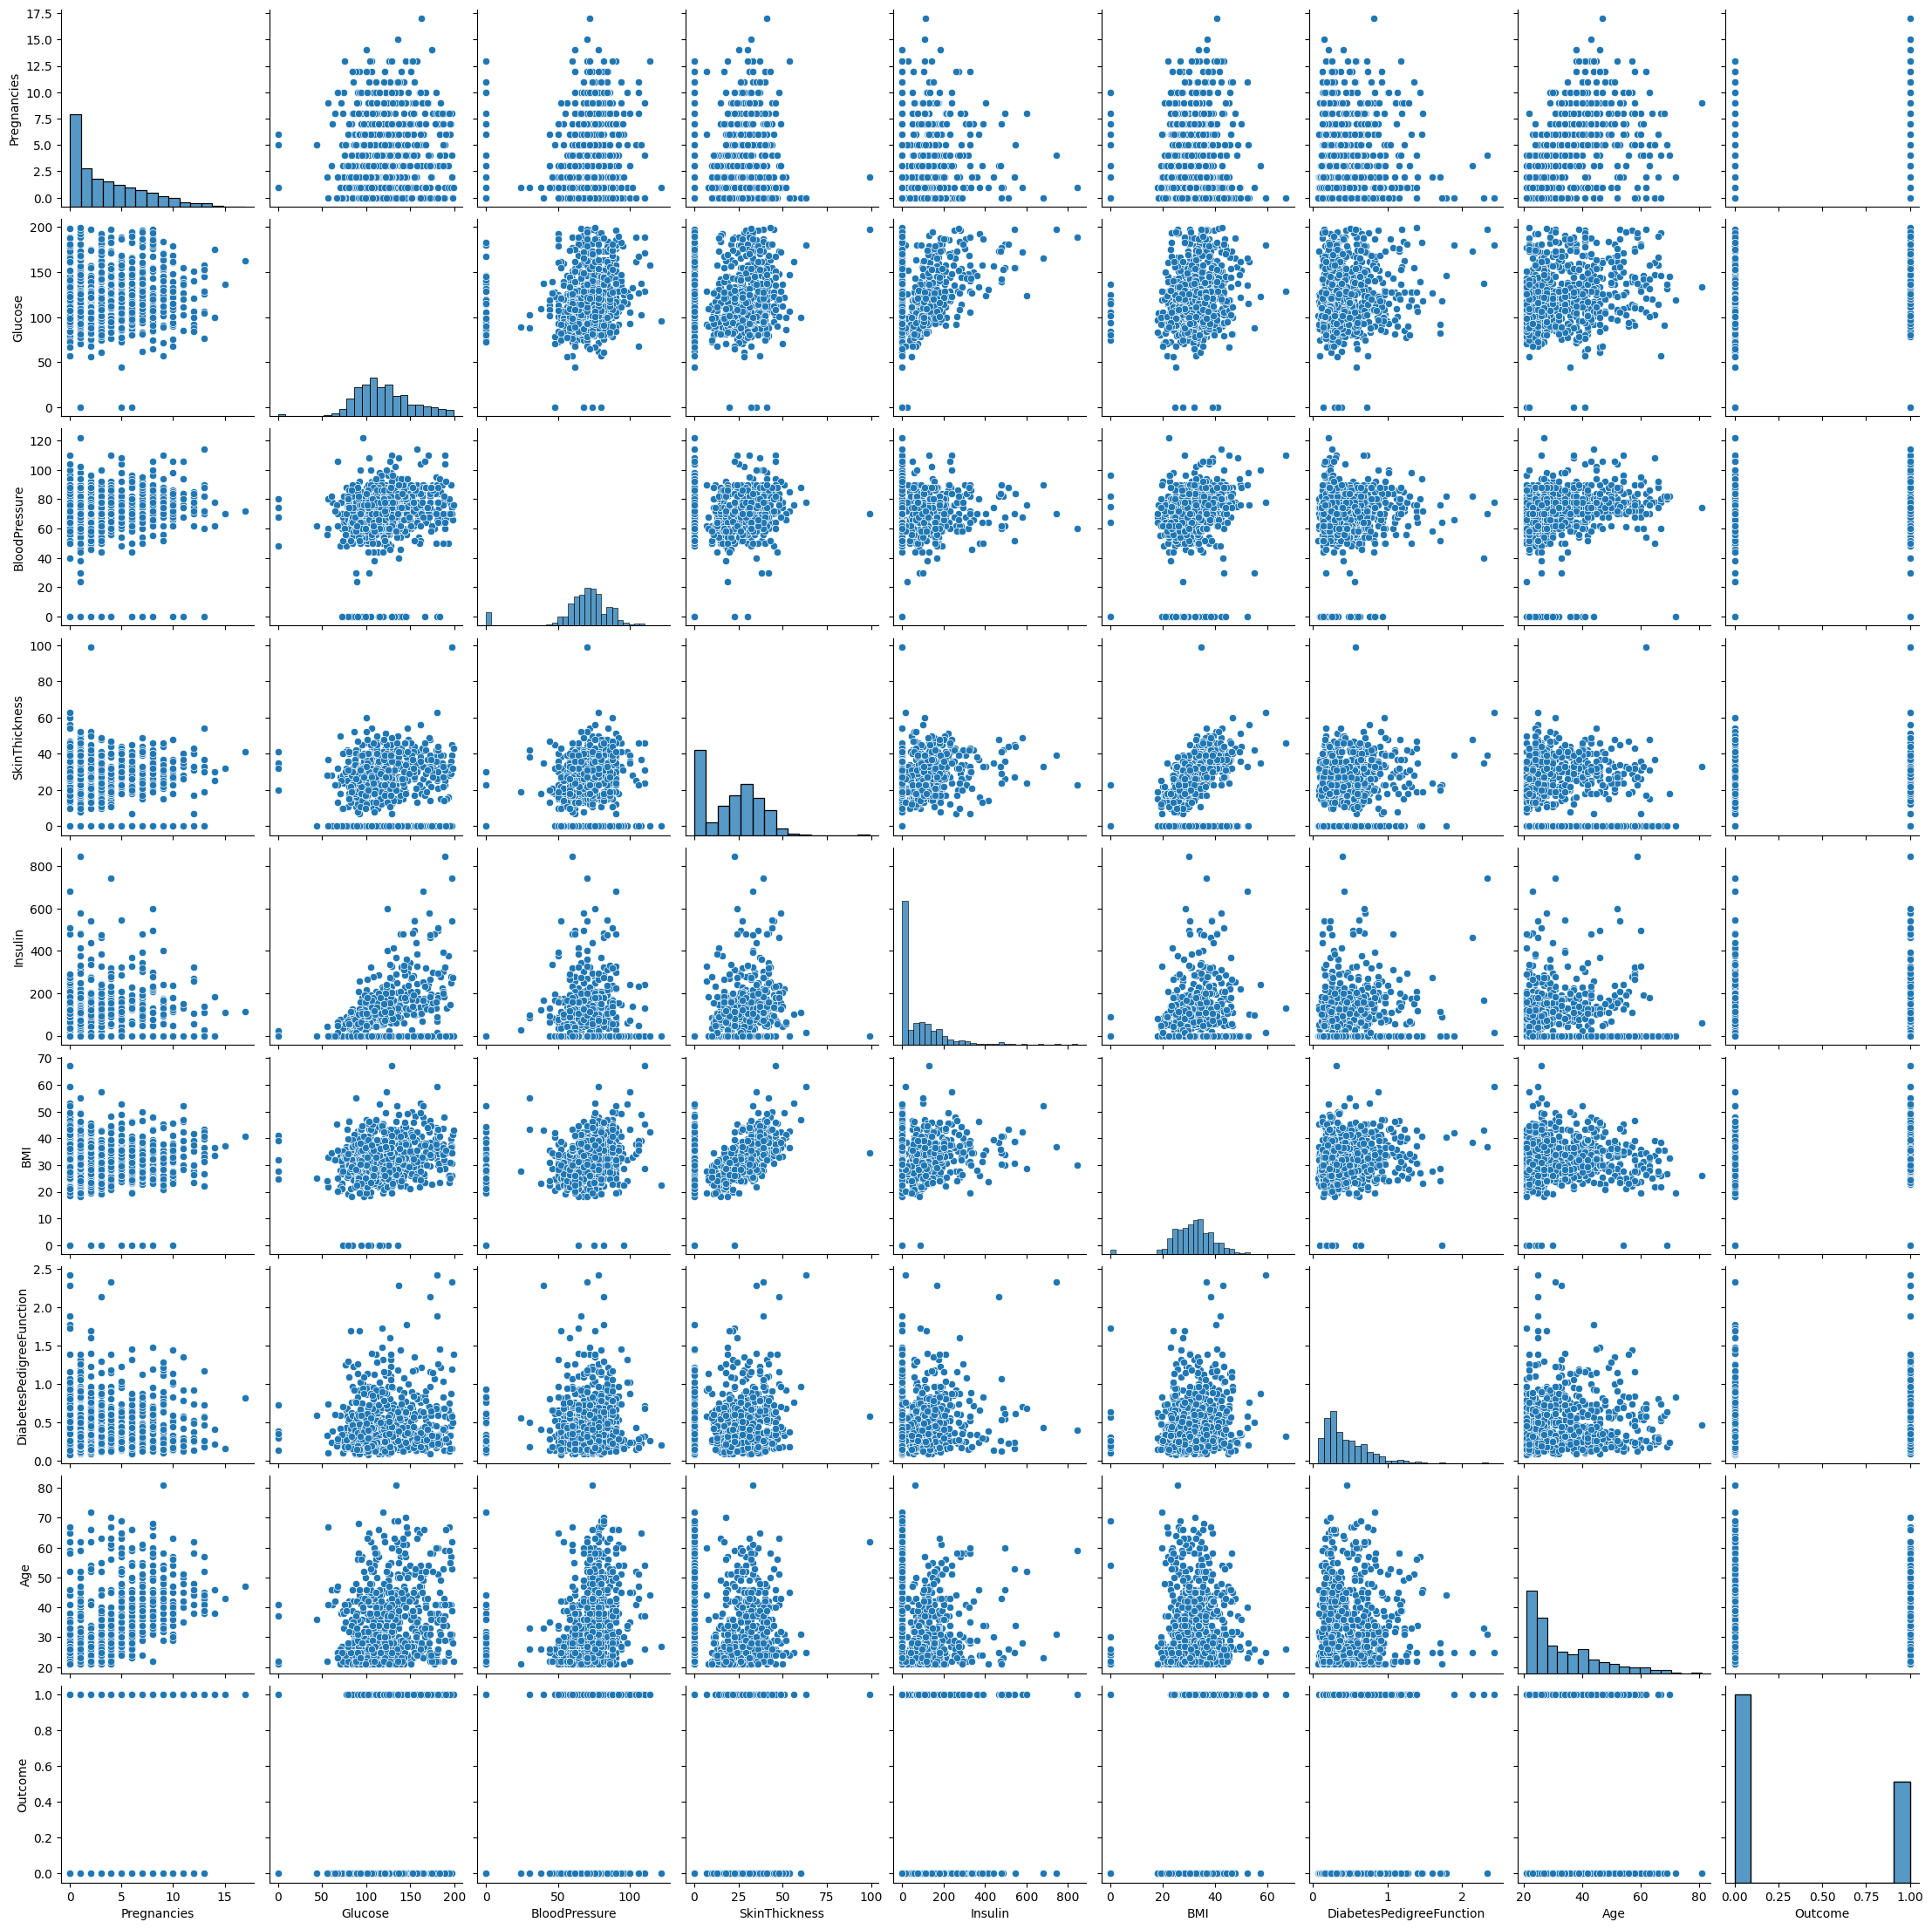

In [37]:
sns.pairplot(df)

In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

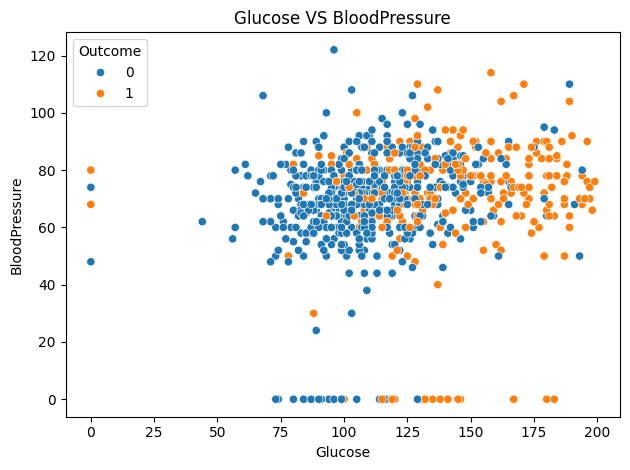

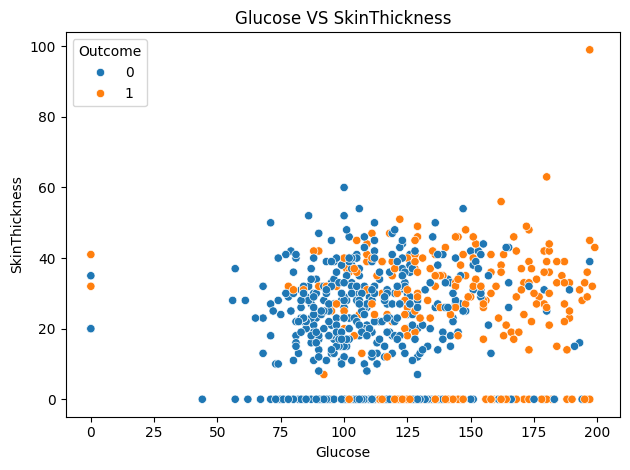

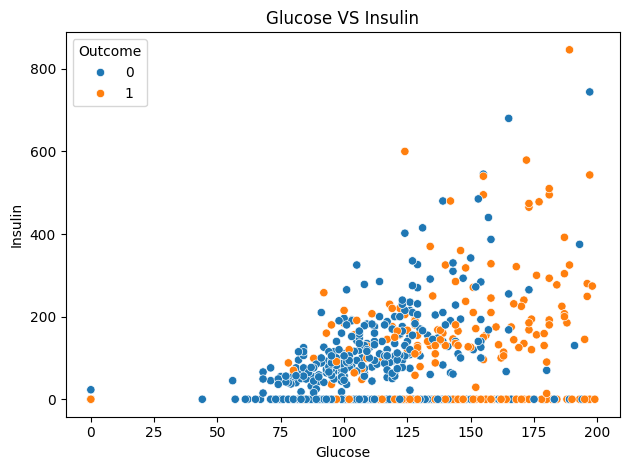

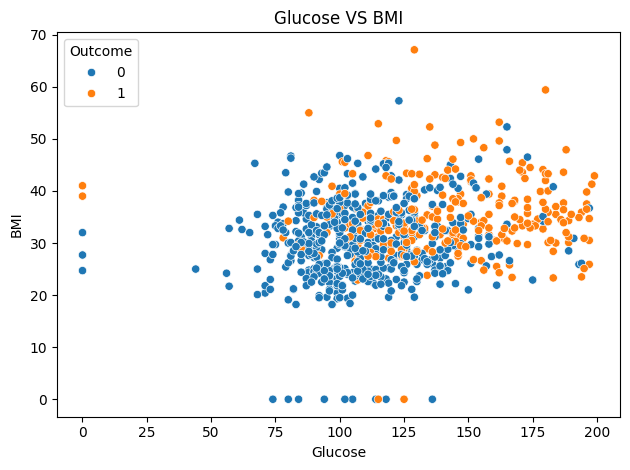

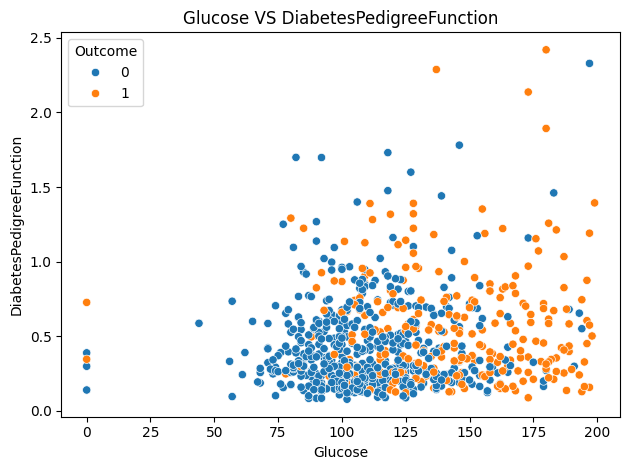

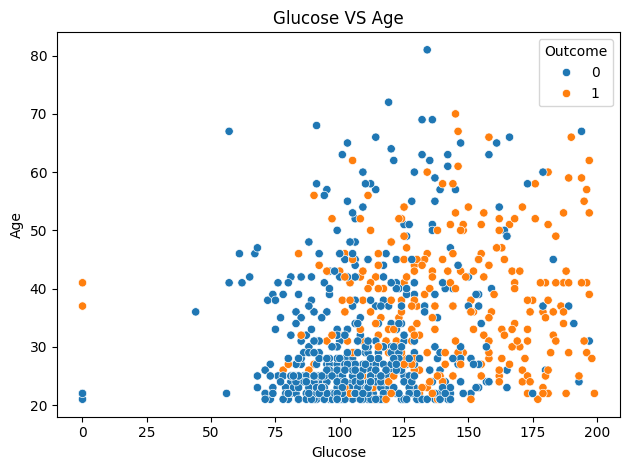

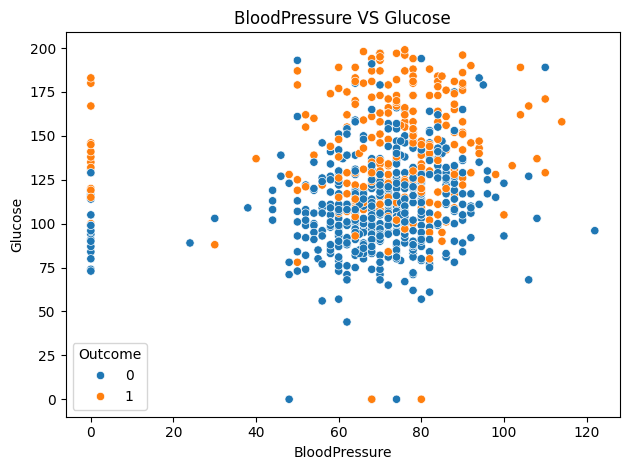

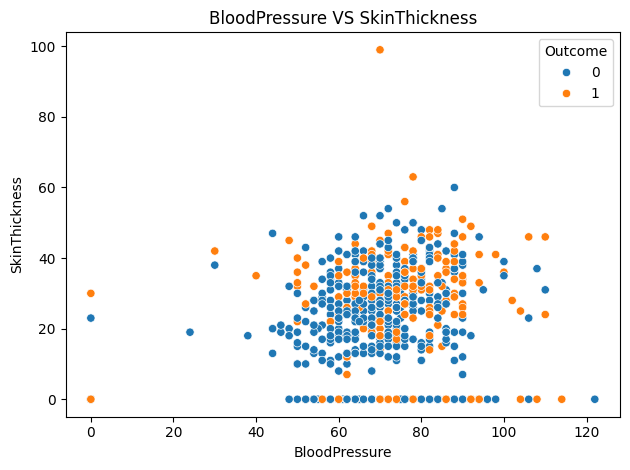

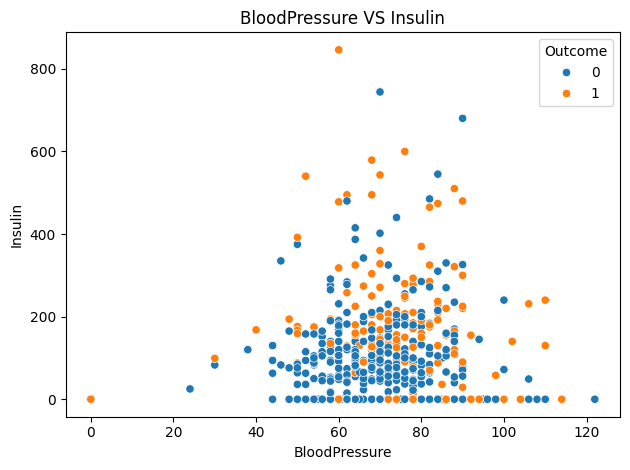

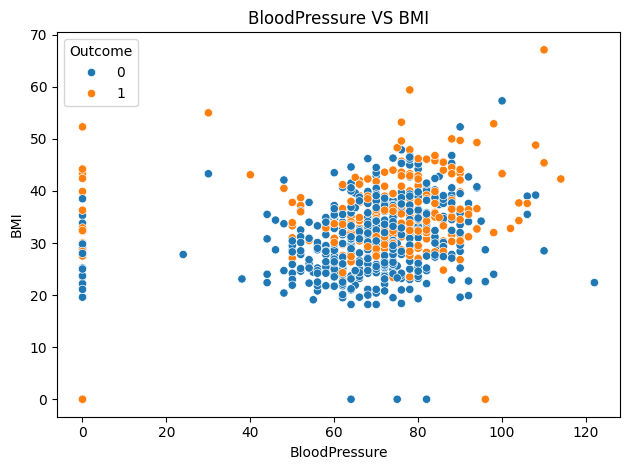

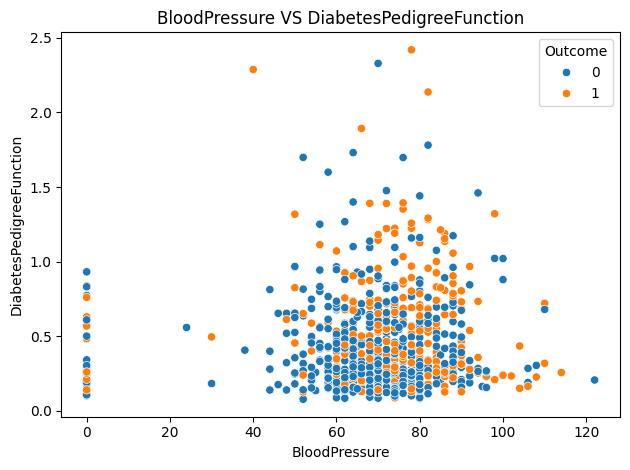

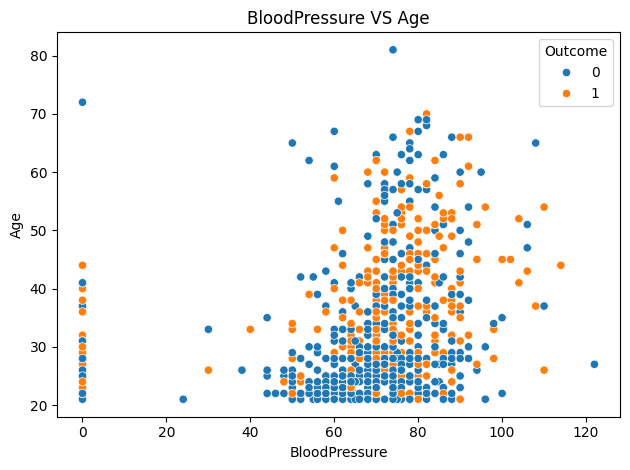

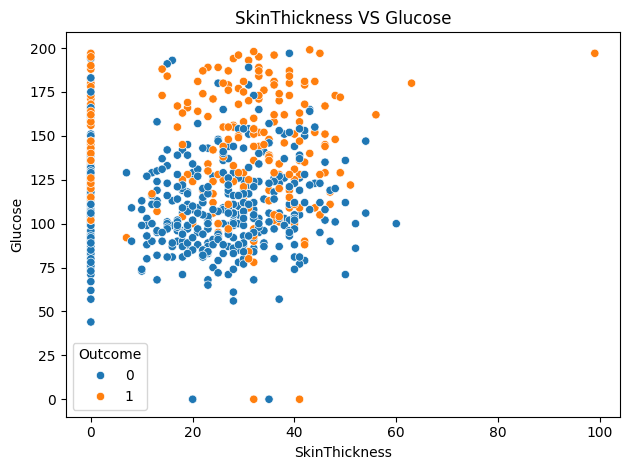

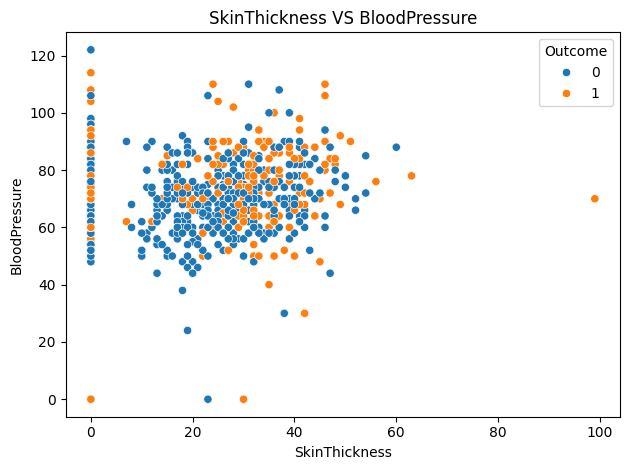

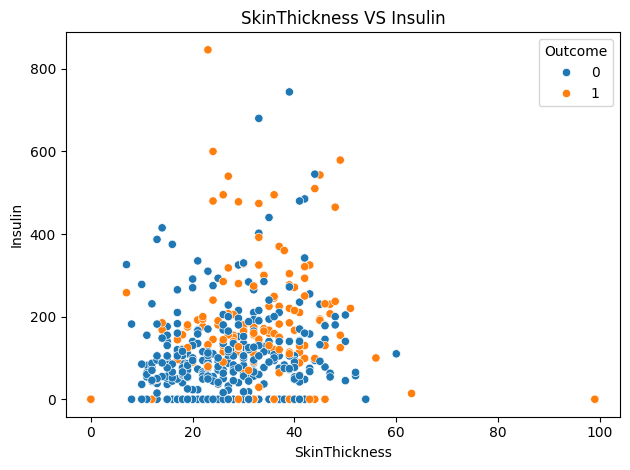

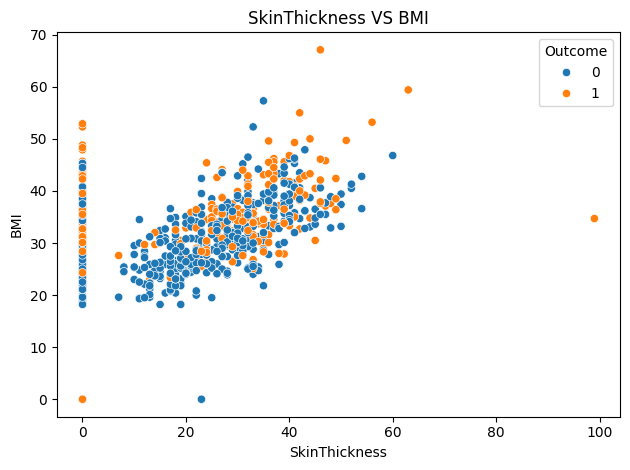

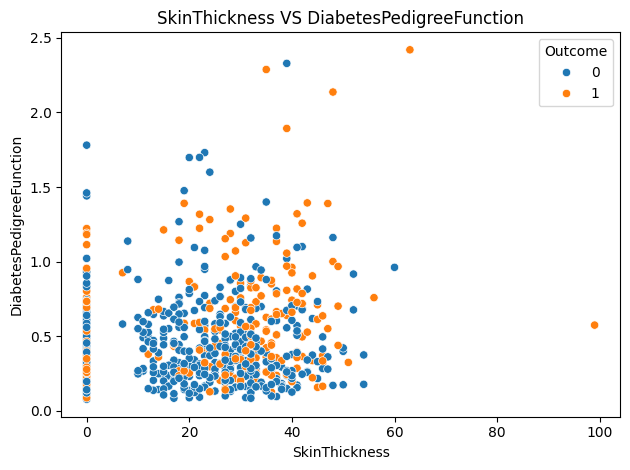

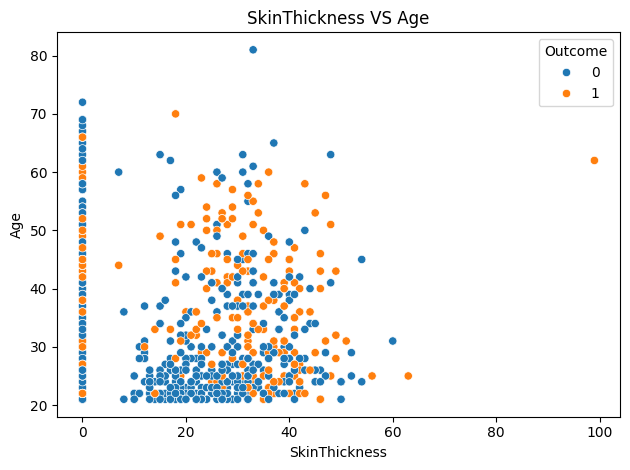

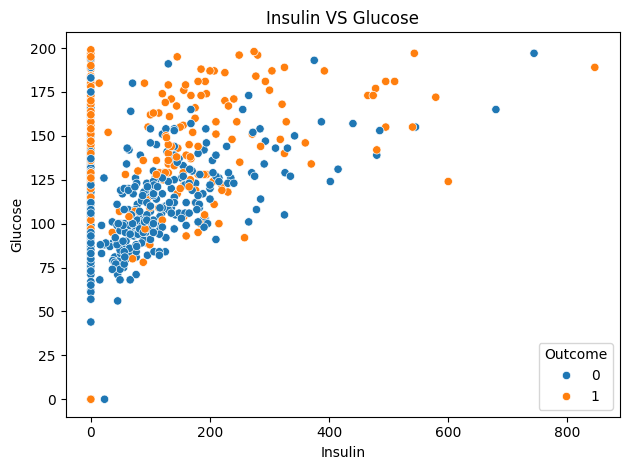

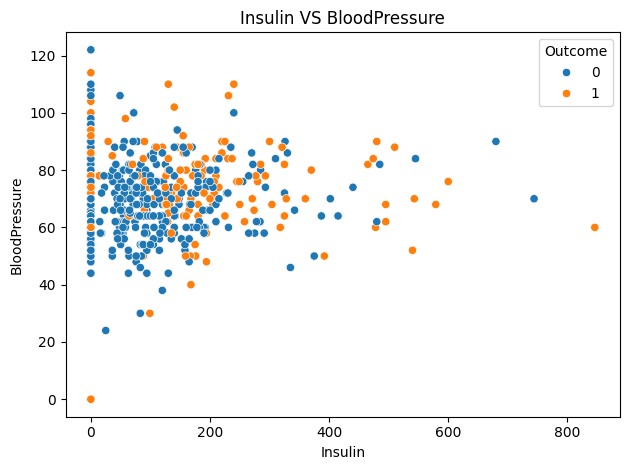

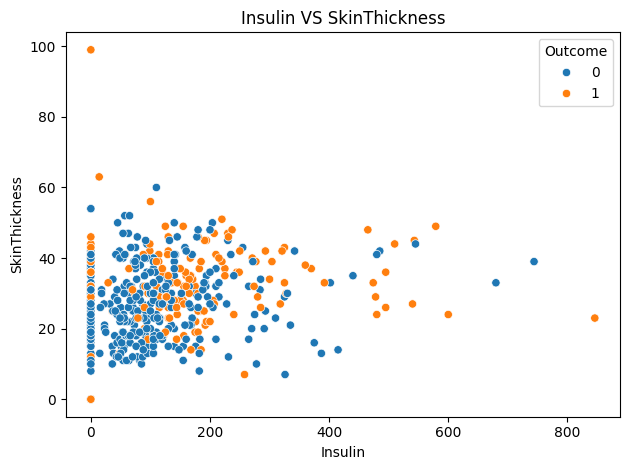

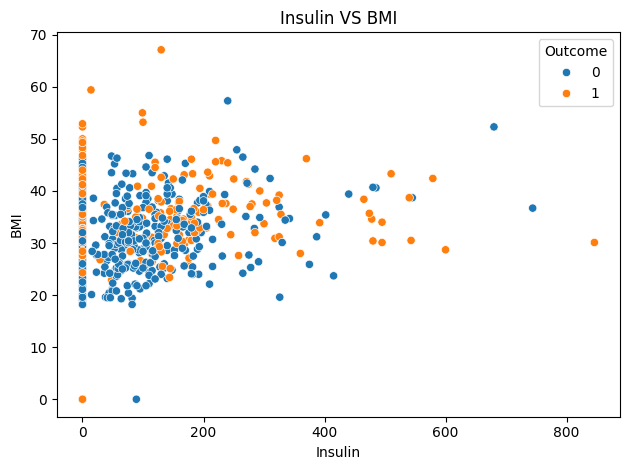

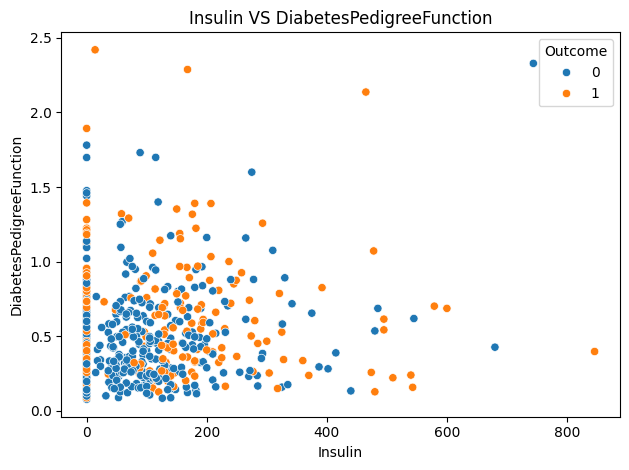

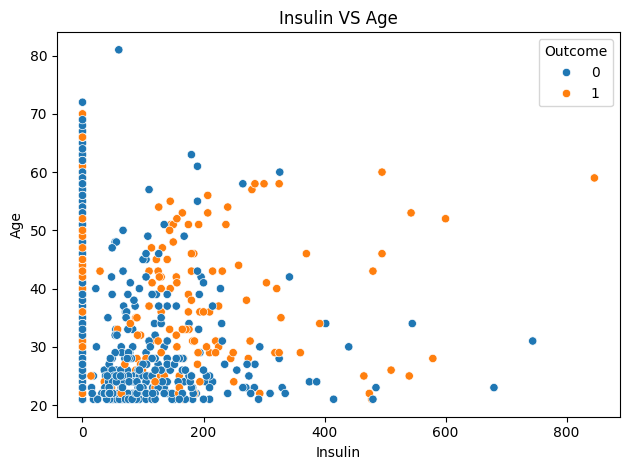

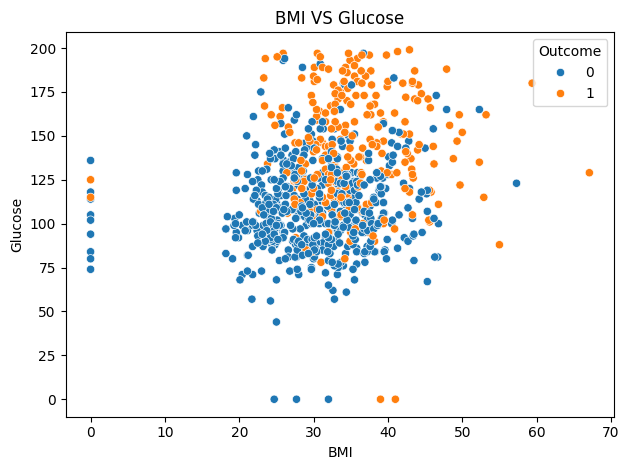

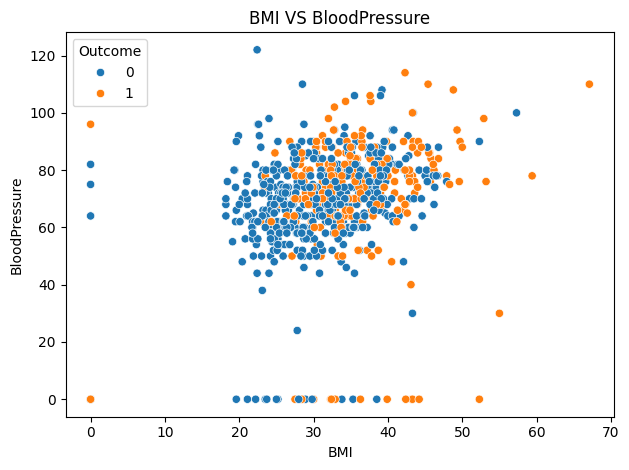

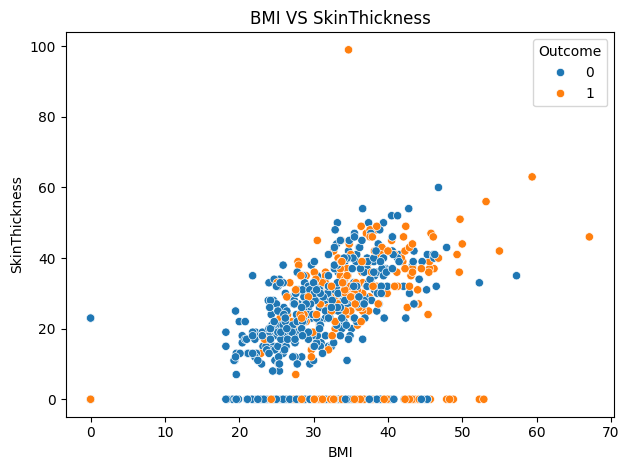

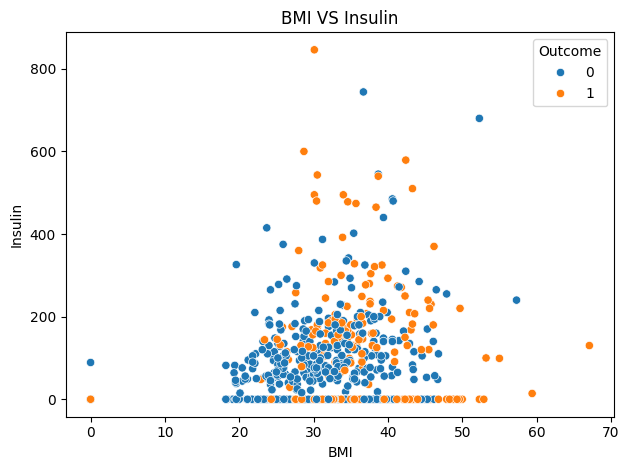

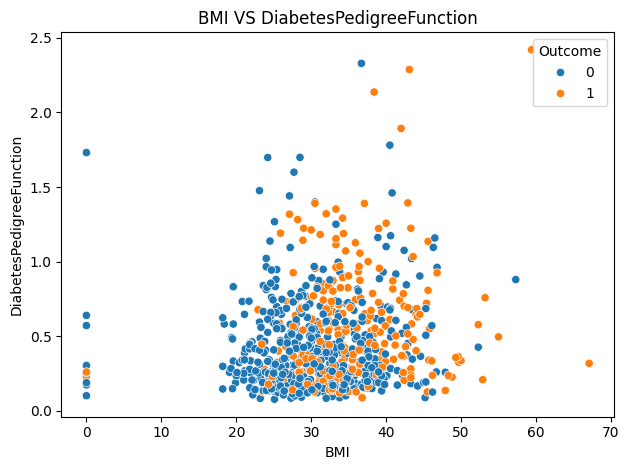

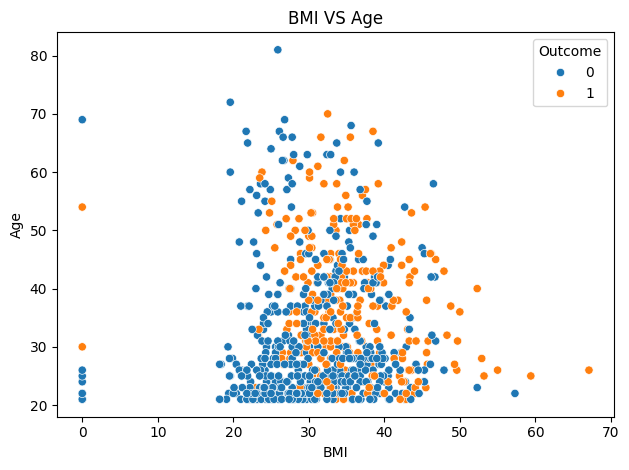

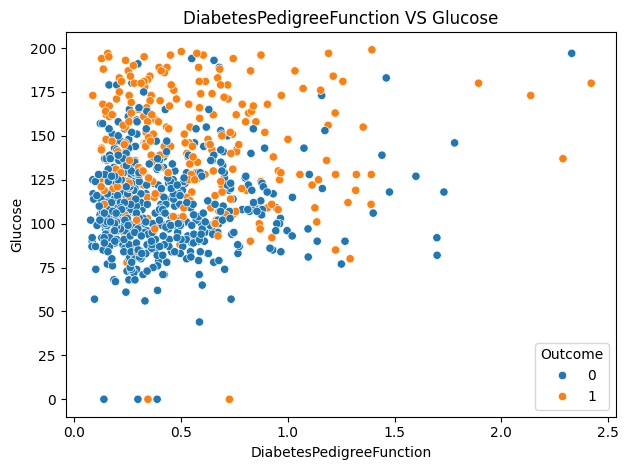

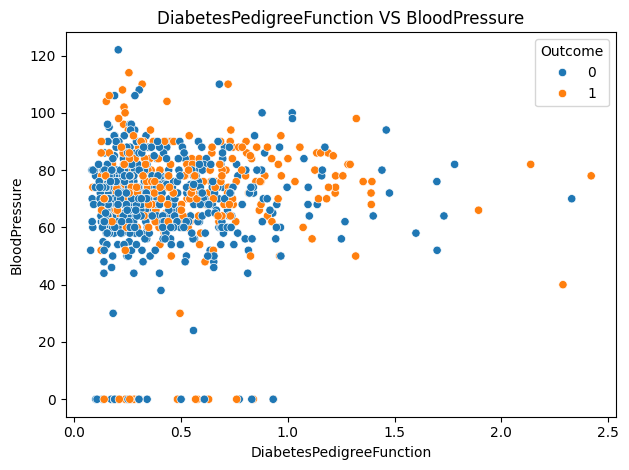

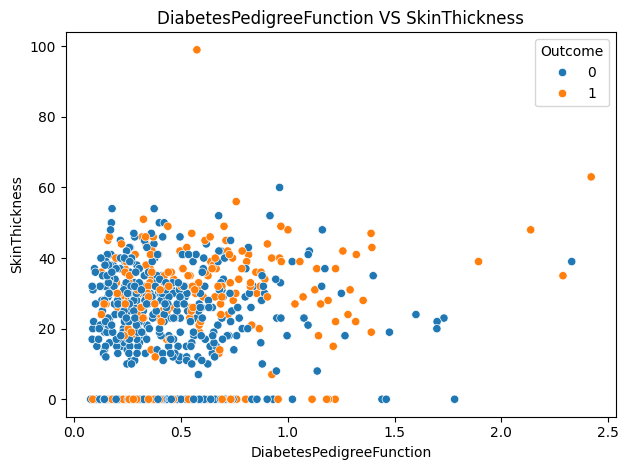

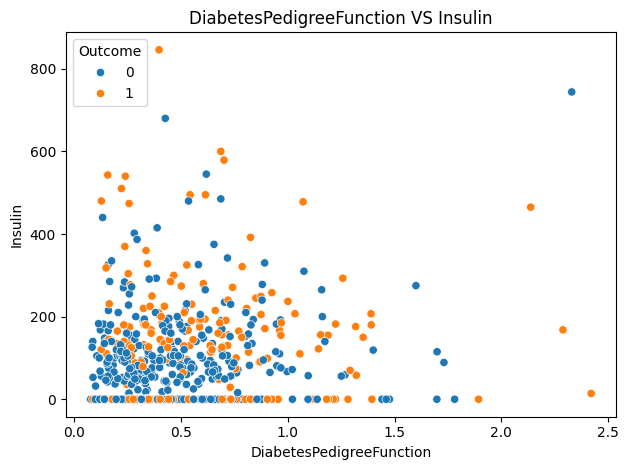

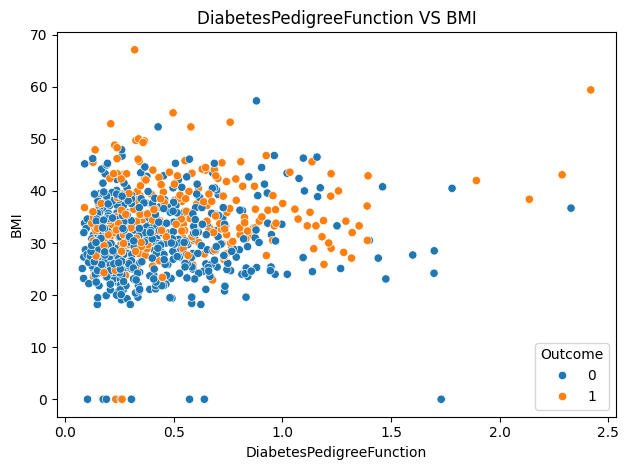

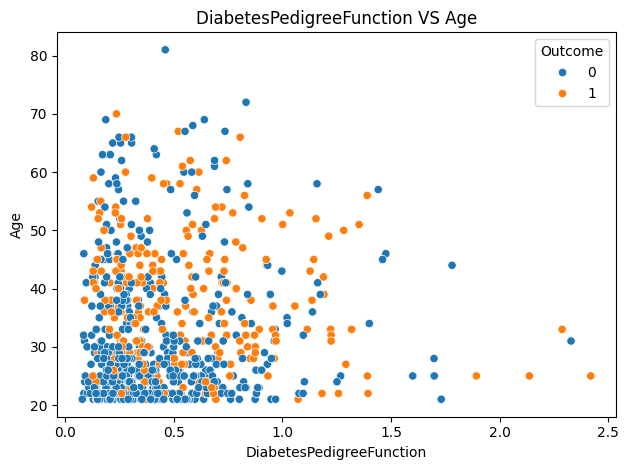

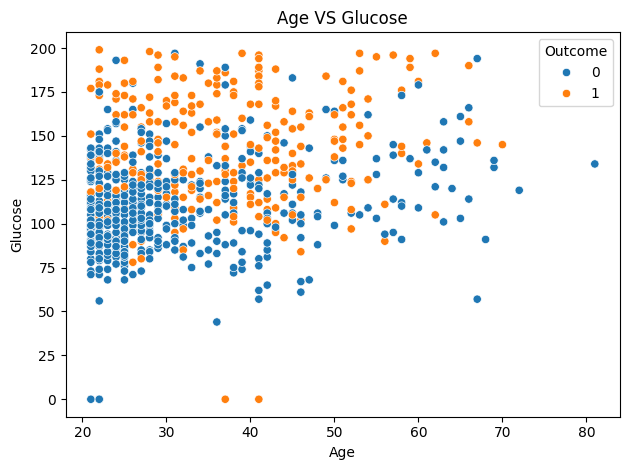

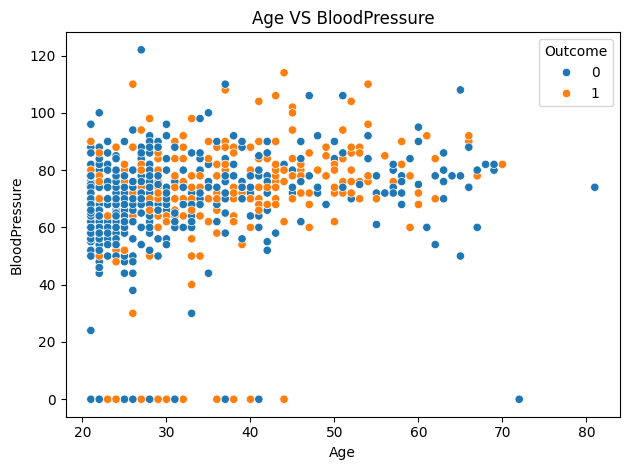

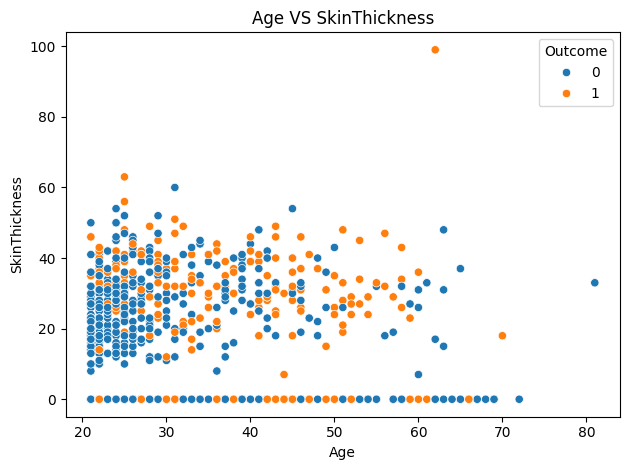

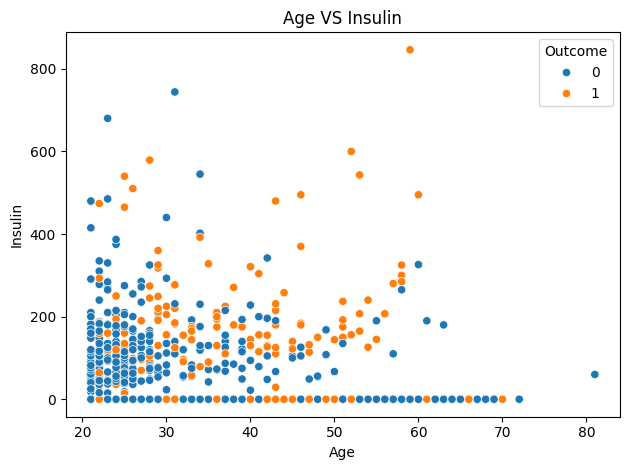

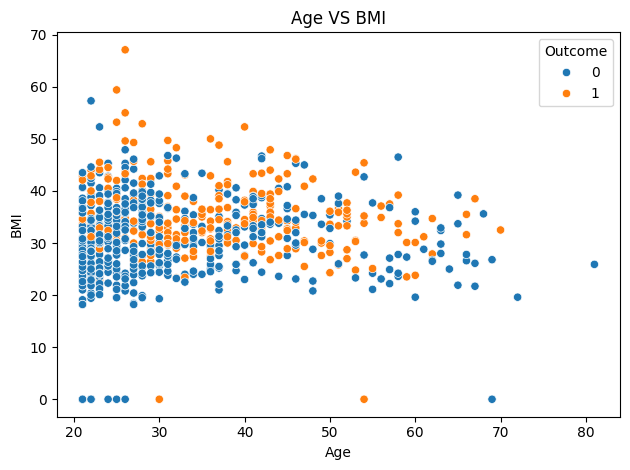

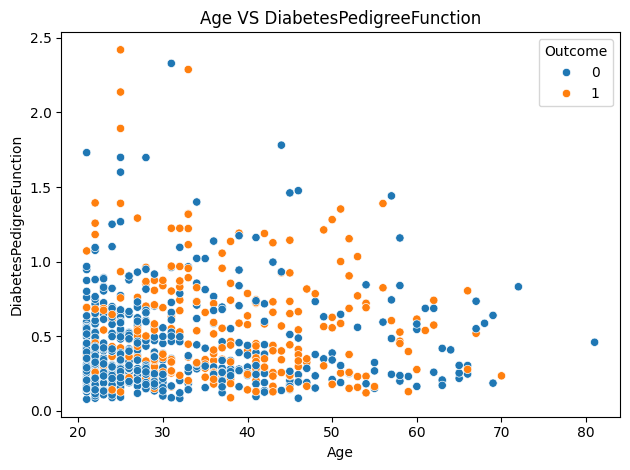

In [39]:
def scatterplot(data,xlable, ylable):
    for i in xlable:
        for j in ylable:
            if i != j :
                plt.title(f"{i} VS {j}")
                sns.scatterplot(data=df, x = i , y = j , hue="Outcome")
                plt.tight_layout()
                plt.show()

scatterplot(df, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'] , ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

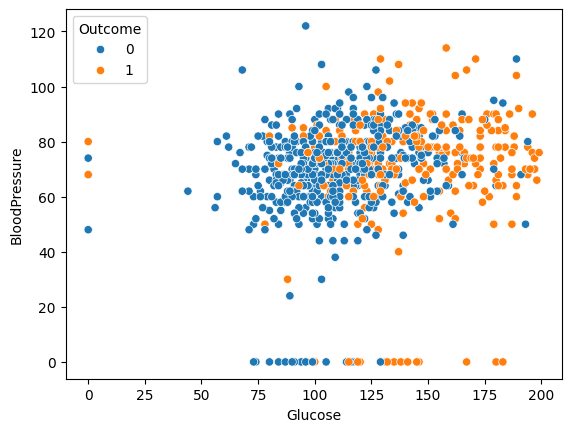

In [40]:
sns.scatterplot(data = df,x = "Glucose",y = "BloodPressure", hue="Outcome")
plt.show()

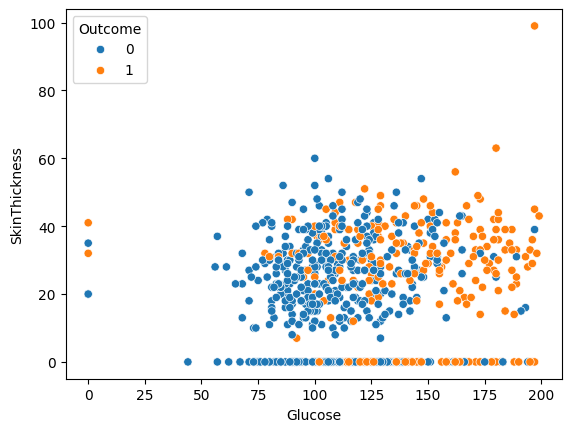

In [41]:
sns.scatterplot(data = df,x = "Glucose",y = "SkinThickness", hue="Outcome")
plt.show()

## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

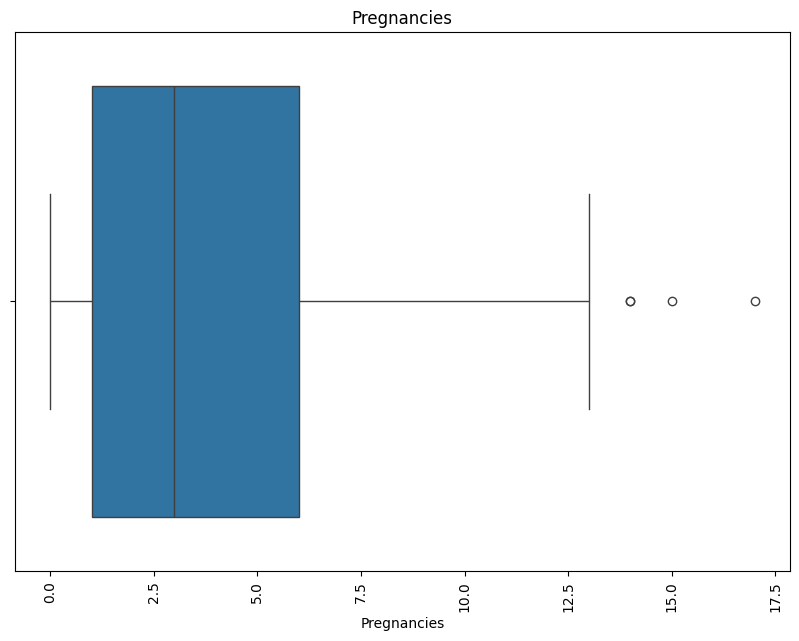

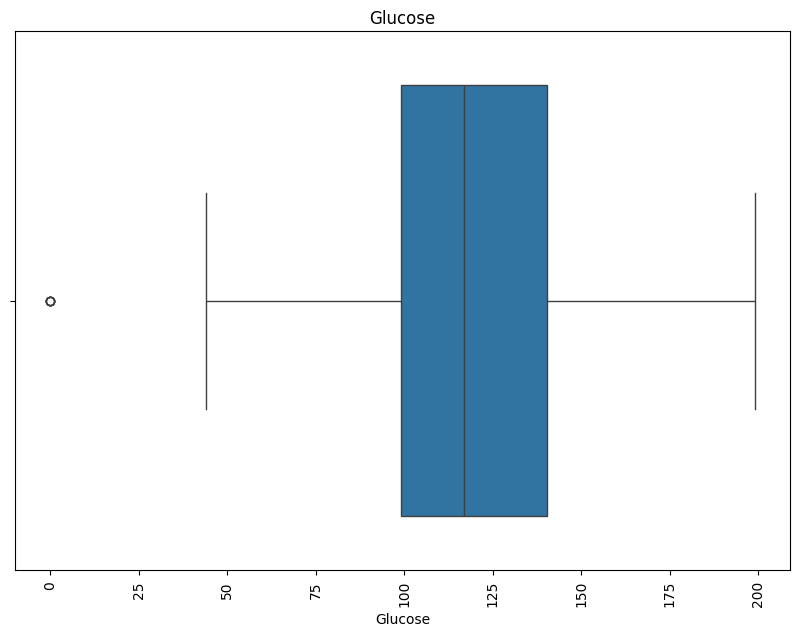

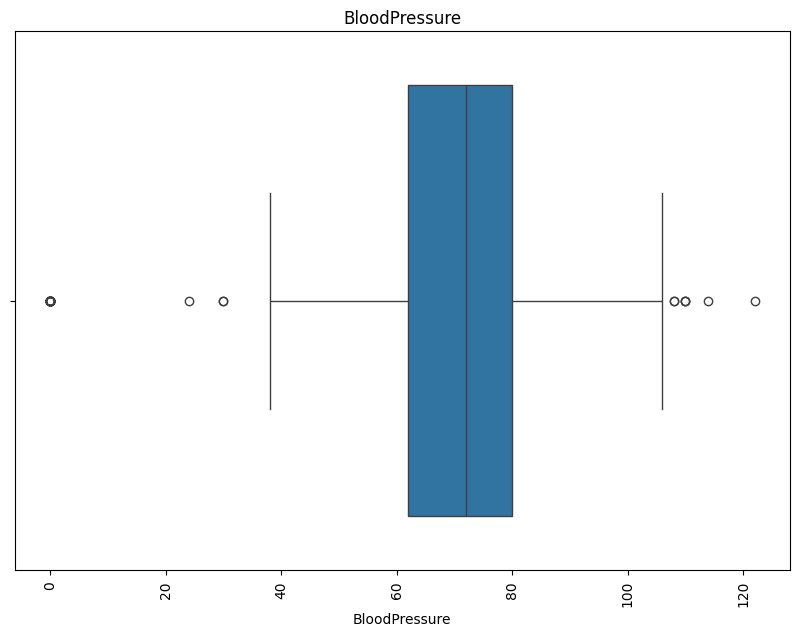

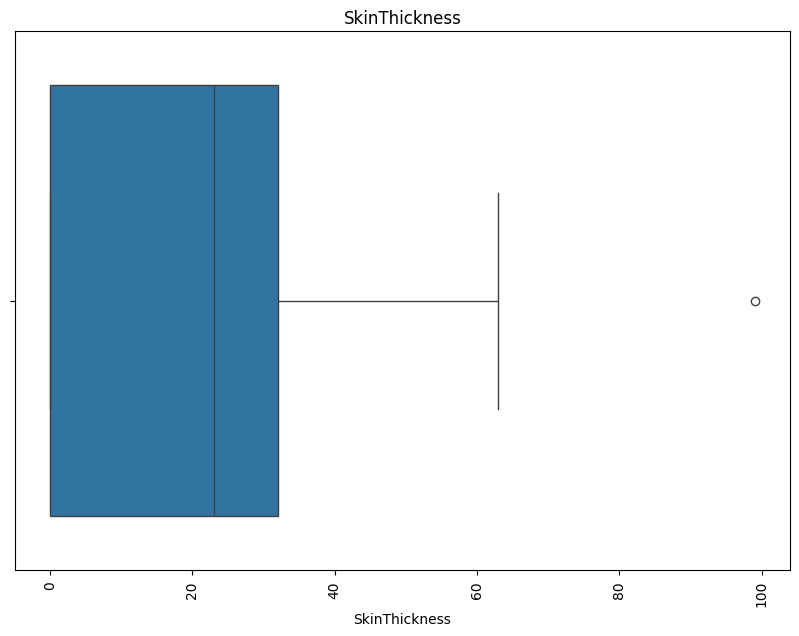

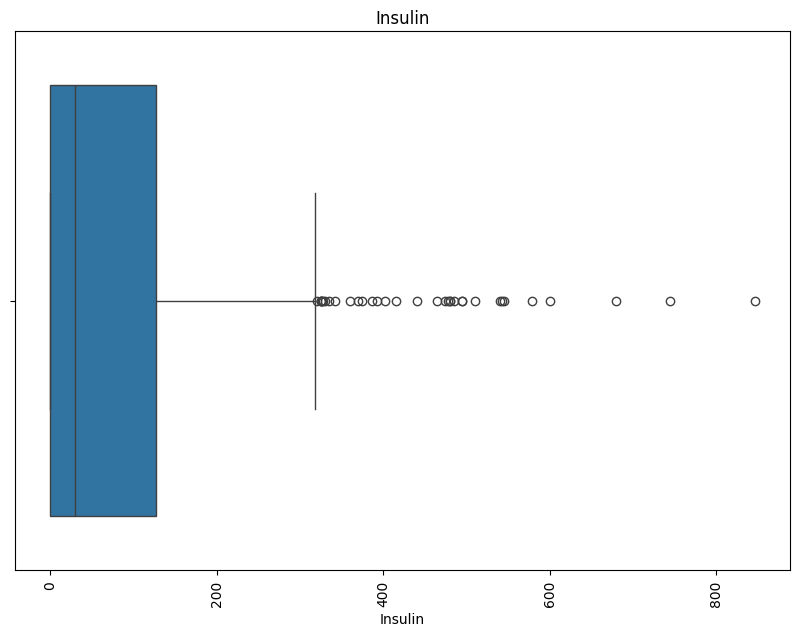

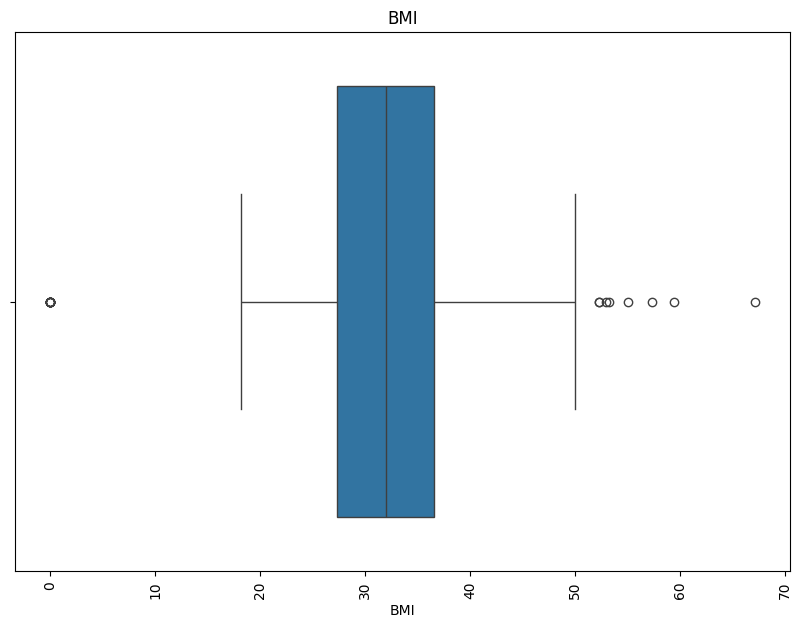

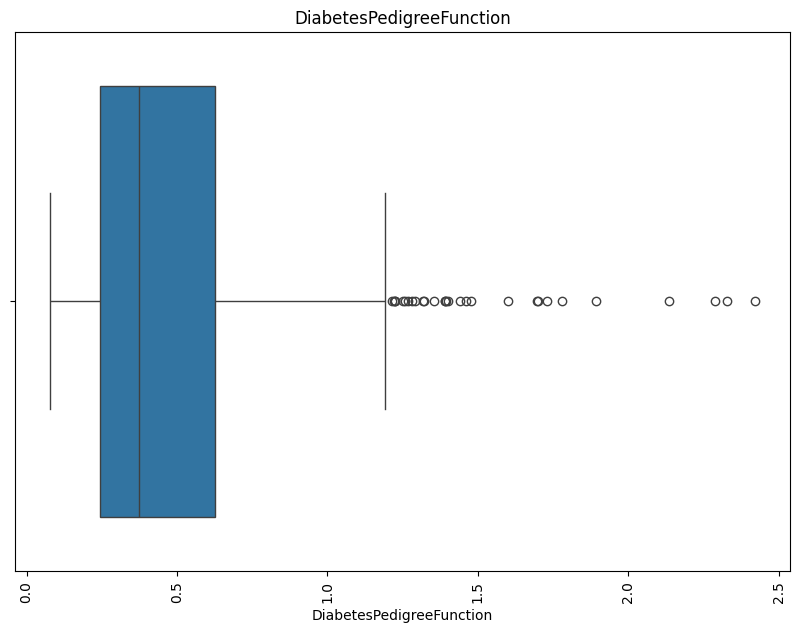

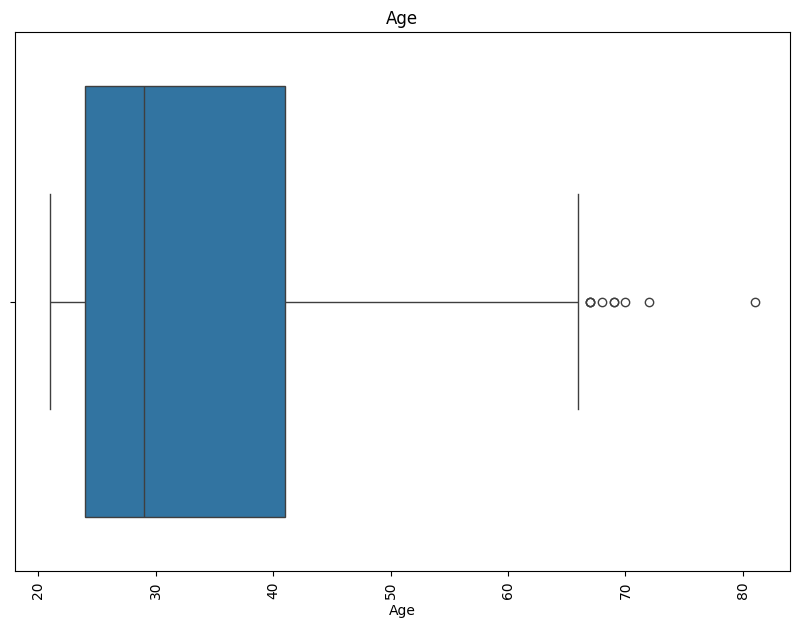

<Figure size 640x480 with 0 Axes>

In [42]:
def boxplot(data, columns):
    for i in columns :
        plt.figure(figsize=(10,7))
        plt.title(i)
        sns.boxplot(data, x = i)
        plt.xticks(rotation=90)
        plt.show()
    plt.tight_layout()

boxplot(df,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [43]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [44]:
df_copy = df.copy()
df_copy

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [45]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
def remove_outliers(data,columns):
    for i in columns :
        Q0, Q1, Q2, Q3, Q4 = np.quantile(data[i],[0.0,0.25,0.50,0.75,1])
        IQR = Q3 - Q1

        lof = Q1 - 1.5*IQR 
        hof = Q3 + 1.5*IQR

        data[i] = np.where(data[i] < lof , data[i].mean(), data[i])
        data[i] = np.where(data[i] > hof , data[i].mean(), data[i])

remove_outliers(df_copy, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

df_copy.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                  0.627000  50.0        1  
1                  0.351000  31.0        0  
2                  0.672000  32.0        1  
3                  0.167000  21.0        0  
4                  0.471876  33.0        1

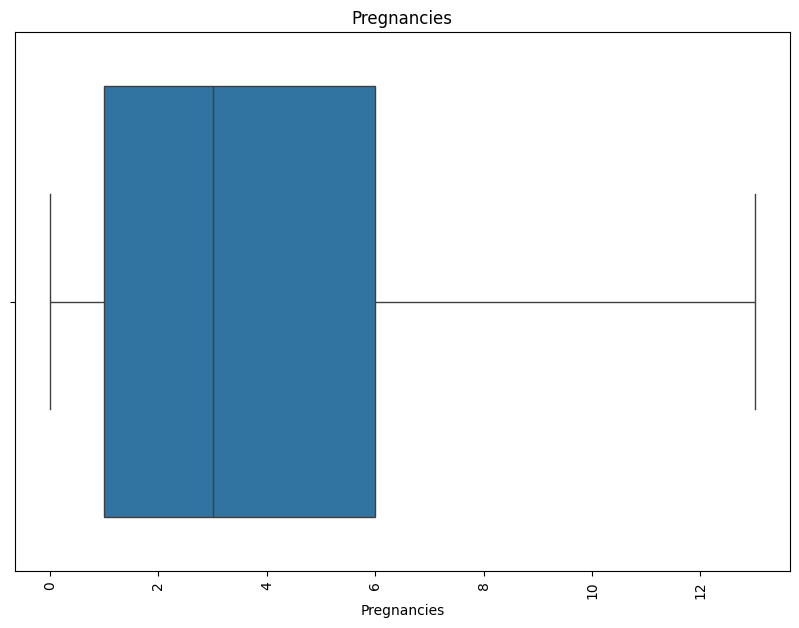

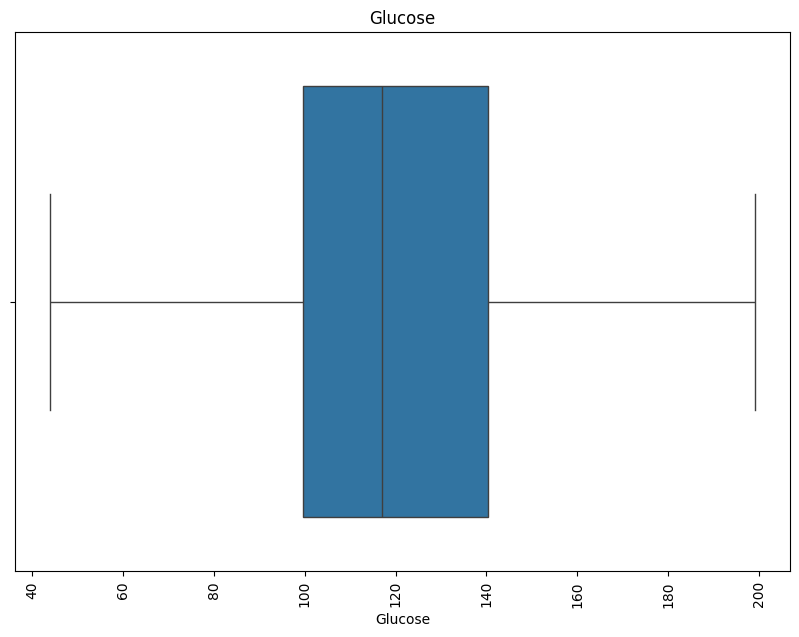

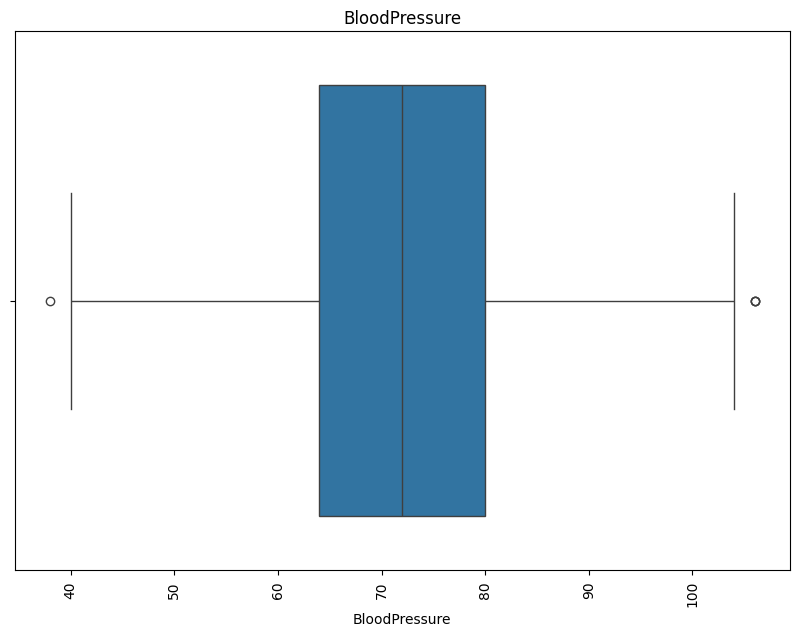

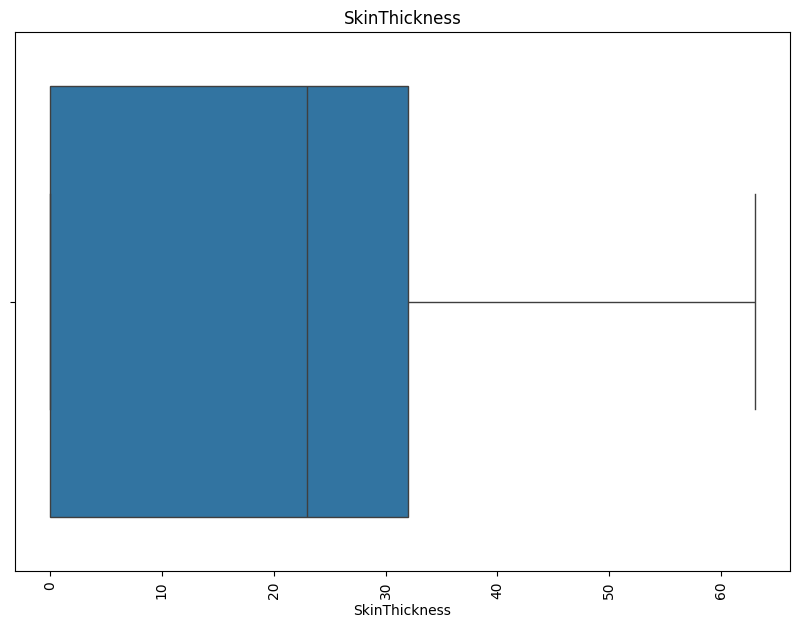

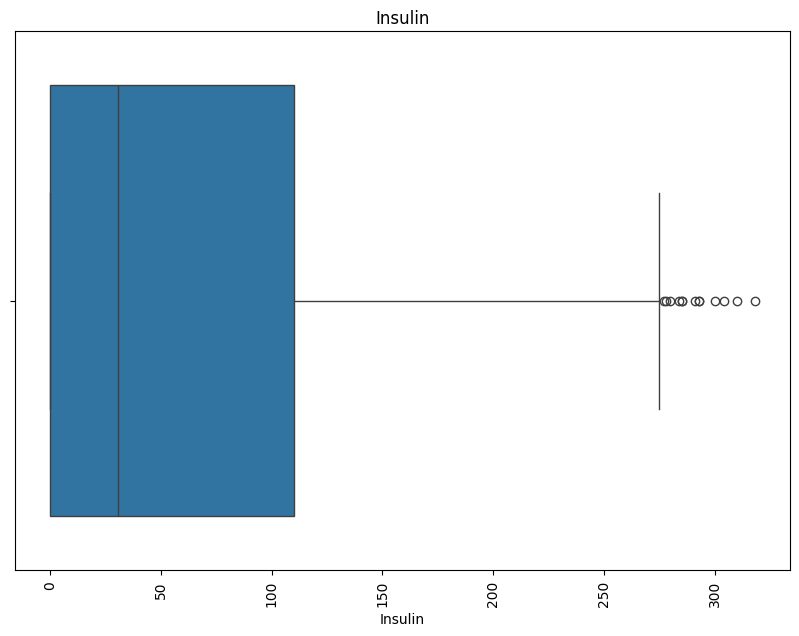

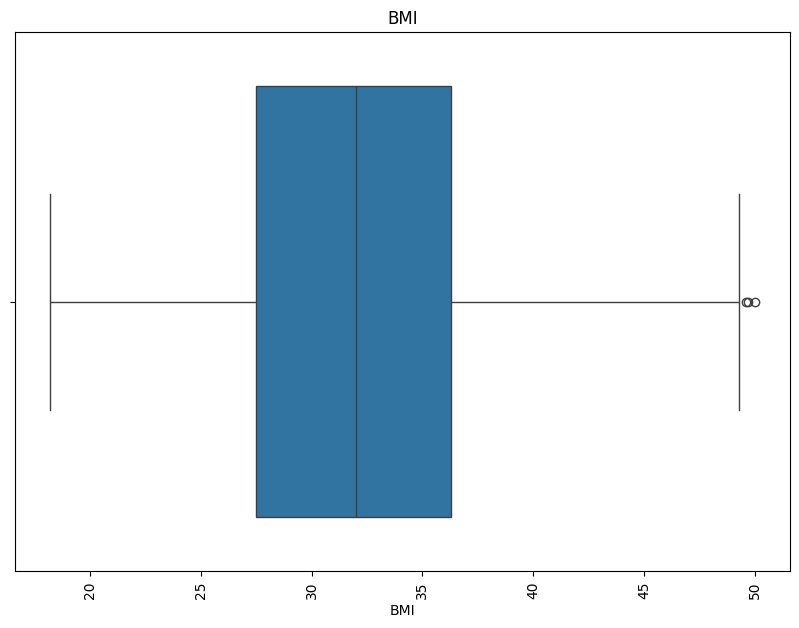

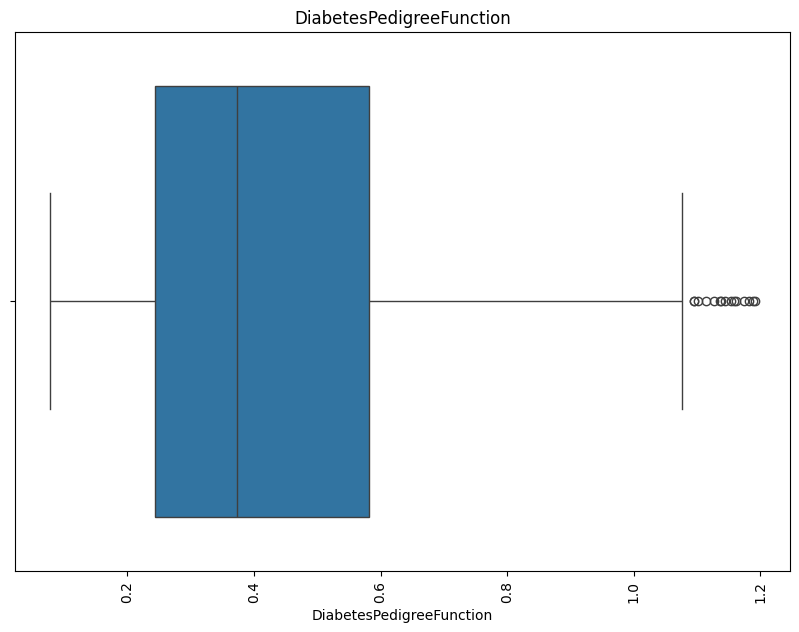

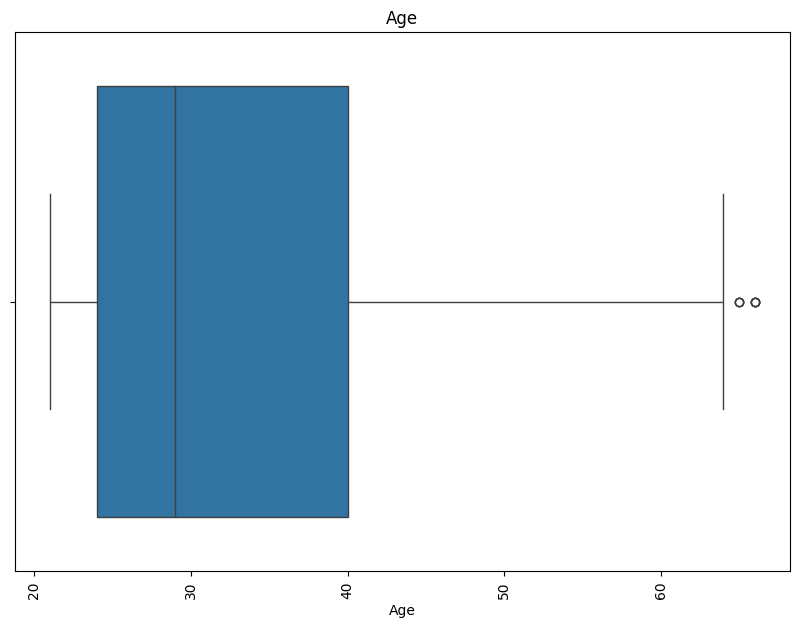

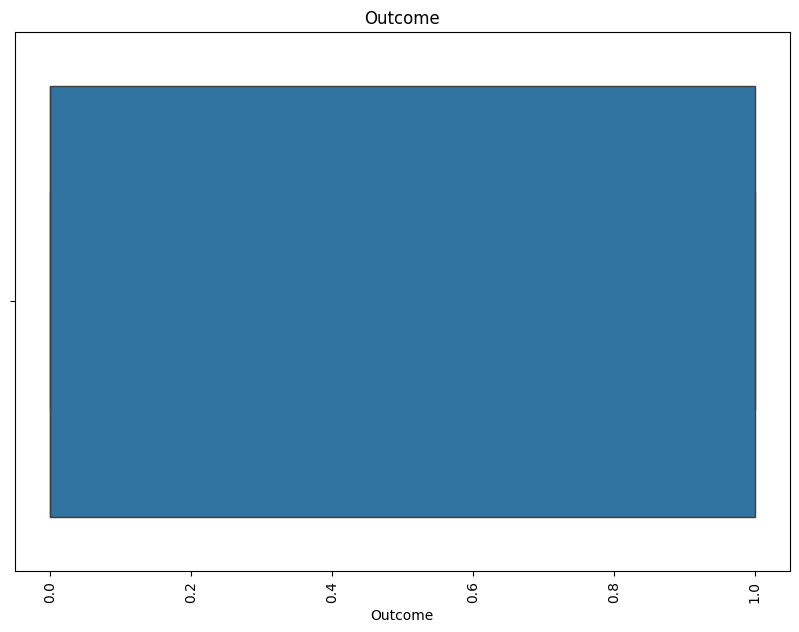

<Figure size 640x480 with 0 Axes>

In [47]:
boxplot(df_copy,df_copy.columns)

In [48]:
df_copy.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                  0.627000  50.0        1  
1                  0.351000  31.0        0  
2                  0.672000  32.0        1  
3                  0.167000  21.0        0  
4                  0.471876  33.0        1

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [49]:
np.random.seed(42)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop("Outcome",axis=1),df_copy["Outcome"],test_size= 0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [51]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
357         13.0    129.0      69.105469           30.0      0.0  39.900000   
73           4.0    129.0      86.000000           20.0    270.0  35.100000   
352          3.0     61.0      82.000000           28.0      0.0  34.400000   
497          2.0     81.0      72.000000           15.0     76.0  30.100000   
145          0.0    102.0      75.000000           23.0      0.0  31.992578   
..           ...      ...            ...            ...      ...        ...   
71           5.0    139.0      64.000000           35.0    140.0  28.600000   
106          1.0     96.0      72.415375            0.0      0.0  22.400000   
270         10.0    101.0      86.000000           37.0      0.0  45.600000   
435          0.0    141.0      69.105469            0.0      0.0  42.400000   
102          0.0    125.0      96.000000            0.0      0.0  22.500000   

     DiabetesPedigreeFunction   Age  
357                     0.569  44.0  
73                      0.231  23.0  
352                     0.243  46.0  
497                     0.547  25.0  
145                     0.572  21.0  
..                        ...   ...  
71                      0.411  26.0  
106                     0.207  27.0  
270                     1.136  38.0  
435                     0.205  29.0  
102                     0.262  21.0  

[576 rows x 8 columns]

In [52]:
y_train

357    1
73     0
352    0
497    0
145    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 576, dtype: int64

In [53]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [54]:
y_test.unique()

array([0, 1], dtype=int64)

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [55]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
accuracy_score(y_test, y_predict)

0.6614583333333334

In [58]:
confusion_matrix(y_test, y_predict)

array([[86, 37],
       [28, 41]], dtype=int64)

In [59]:
len(df_copy.columns)

9

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param = {
    "criterion" : ["gini", "entropy", "logloss"],
    "splitter" : ["best", "random"],
    "max_depth" : [5,6,7,8]
}
param

{'criterion': ['gini', 'entropy', 'logloss'],
 'splitter': ['best', 'random'],
 'max_depth': [5, 6, 7, 8]}

In [62]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = param, cv = 10, verbose = 1)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [63]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [64]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [65]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [66]:
grid.best_index_

8

In [67]:
grid.cv

10

In [68]:
grid.cv_results_

{'mean_fit_time': array([0.00583868, 0.00303459, 0.00100591, 0.        , 0.00229094,
        0.00071151, 0.00525446, 0.00157008, 0.0046876 , 0.        ,
        0.00468571, 0.00312464, 0.00784476, 0.        , 0.00580344,
        0.00265148, 0.        , 0.00068941, 0.000284  , 0.00164683,
        0.00182886, 0.00135229, 0.        , 0.00012224]),
 'std_fit_time': array([0.00538277, 0.00459349, 0.00127322, 0.        , 0.0014123 ,
        0.00091692, 0.00449599, 0.00471025, 0.00716042, 0.        ,
        0.00715754, 0.00624928, 0.00784592, 0.        , 0.00721507,
        0.00447875, 0.        , 0.00075814, 0.00048644, 0.00494049,
        0.0047657 , 0.00405686, 0.        , 0.00025658]),
 'mean_score_time': array([0.00185153, 0.00132897, 0.00196483, 0.00312481, 0.00150516,
        0.00196283, 0.00132174, 0.00312464, 0.        , 0.00312519,
        0.        , 0.        , 0.        , 0.00475121, 0.00010154,
        0.00040734, 0.        , 0.        , 0.        , 0.        ,
        0.      

In [69]:
model = DecisionTreeClassifier(criterion =  'entropy', max_depth = 5, splitter = 'best')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [70]:
y_pre = model.predict(X_test)
y_pre

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [71]:
accuracy = accuracy_score(y_test, y_pre)
accuracy

0.7135416666666666

## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [73]:
recall = recall_score(y_test, y_predict)
recall

0.5942028985507246

In [74]:
precision = precision_score(y_test, y_predict)
precision

0.5256410256410257

In [75]:
f_score = f1_score(y_test, y_predict)
f_score

0.5578231292517006

In [76]:
fpr, tpr, threshold = roc_curve(y_test , y_predict)
print(f"the false positive rate is : {fpr}, true positive rate is : {tpr}, threshold is : {threshold}"
     ) 

the false positive rate is : [0.         0.30081301 1.        ], true positive rate is : [0.        0.5942029 1.       ], threshold is : [inf  1.  0.]


In [77]:
tpr

array([0.       , 0.5942029, 1.       ])

In [78]:
fpr

array([0.        , 0.30081301, 1.        ])

In [79]:
threshold

array([inf,  1.,  0.])

In [80]:
auc = roc_auc_score(y_test , y_predict)
auc

0.6466949452103217

[]

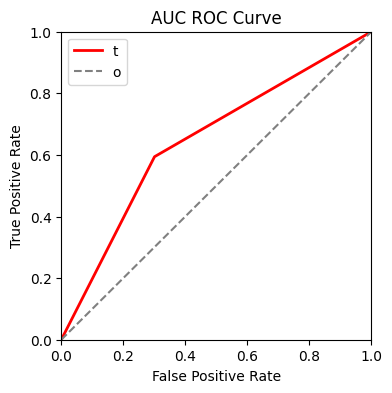

In [81]:
plt.figure(figsize=(4,4))
plt.title("AUC ROC Curve")
plt.plot(fpr,tpr,lw=2,label=f'ROC Curve (AUC ={auc:.2f})', color = "red")
plt.plot([0,1],[0,1],color = "gray", linestyle = "--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend("top right")
plt.plot()

In [82]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[86, 37],
       [28, 41]], dtype=int64)

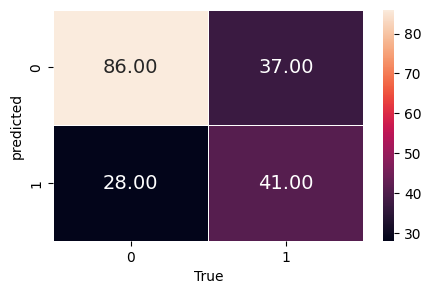

In [79]:
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt="0.2f", linewidths=0.5, annot_kws= {"fontsize":14})
plt.xlabel("True")
plt.ylabel("predicted")
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

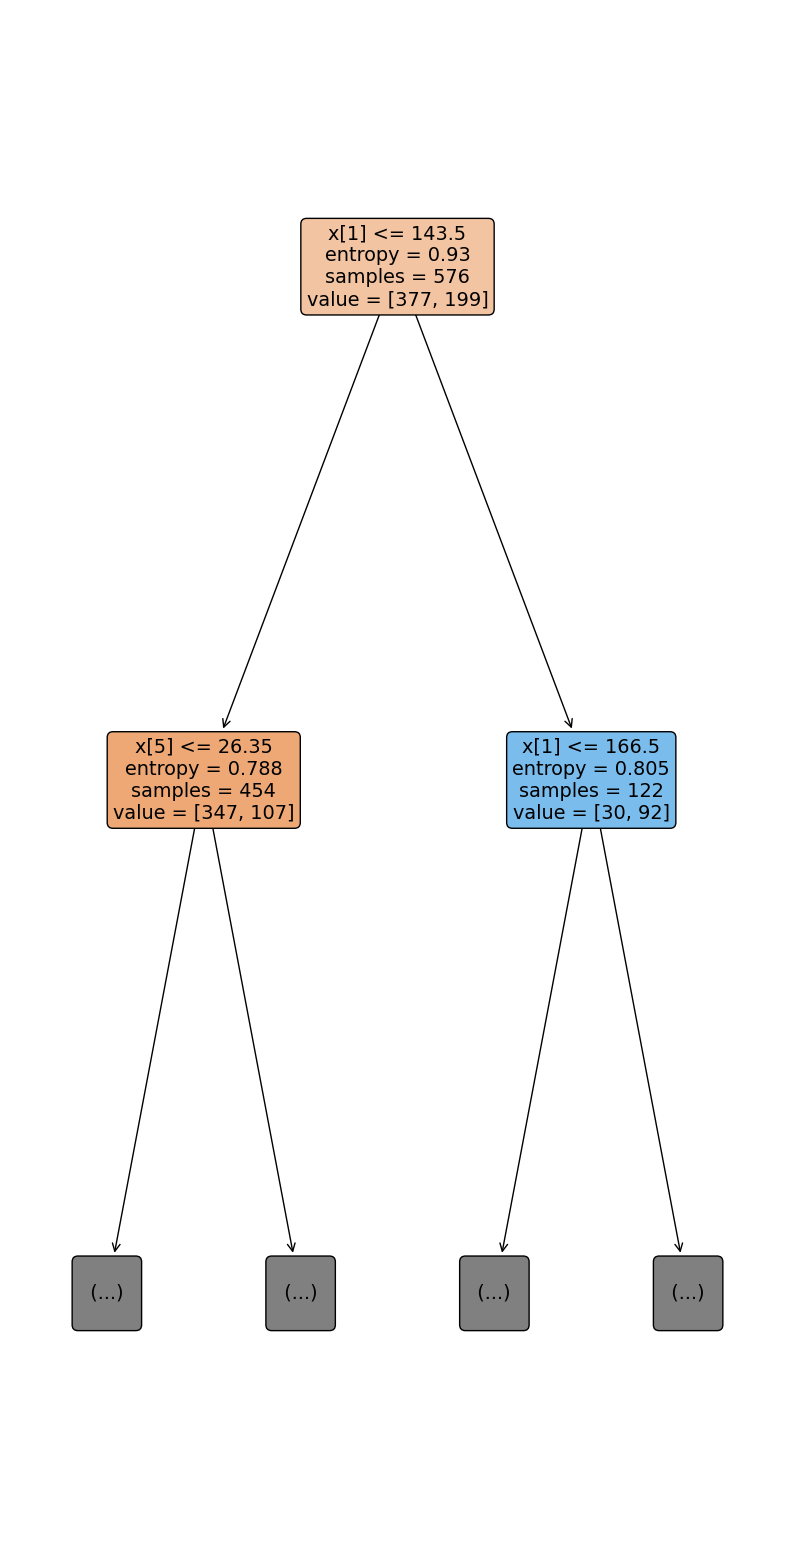

In [83]:
plt.figure(figsize=(10,20))
plt.title("TREE")
plot_tree(model, filled = True, max_depth = 1, rounded = True)
plt.show()

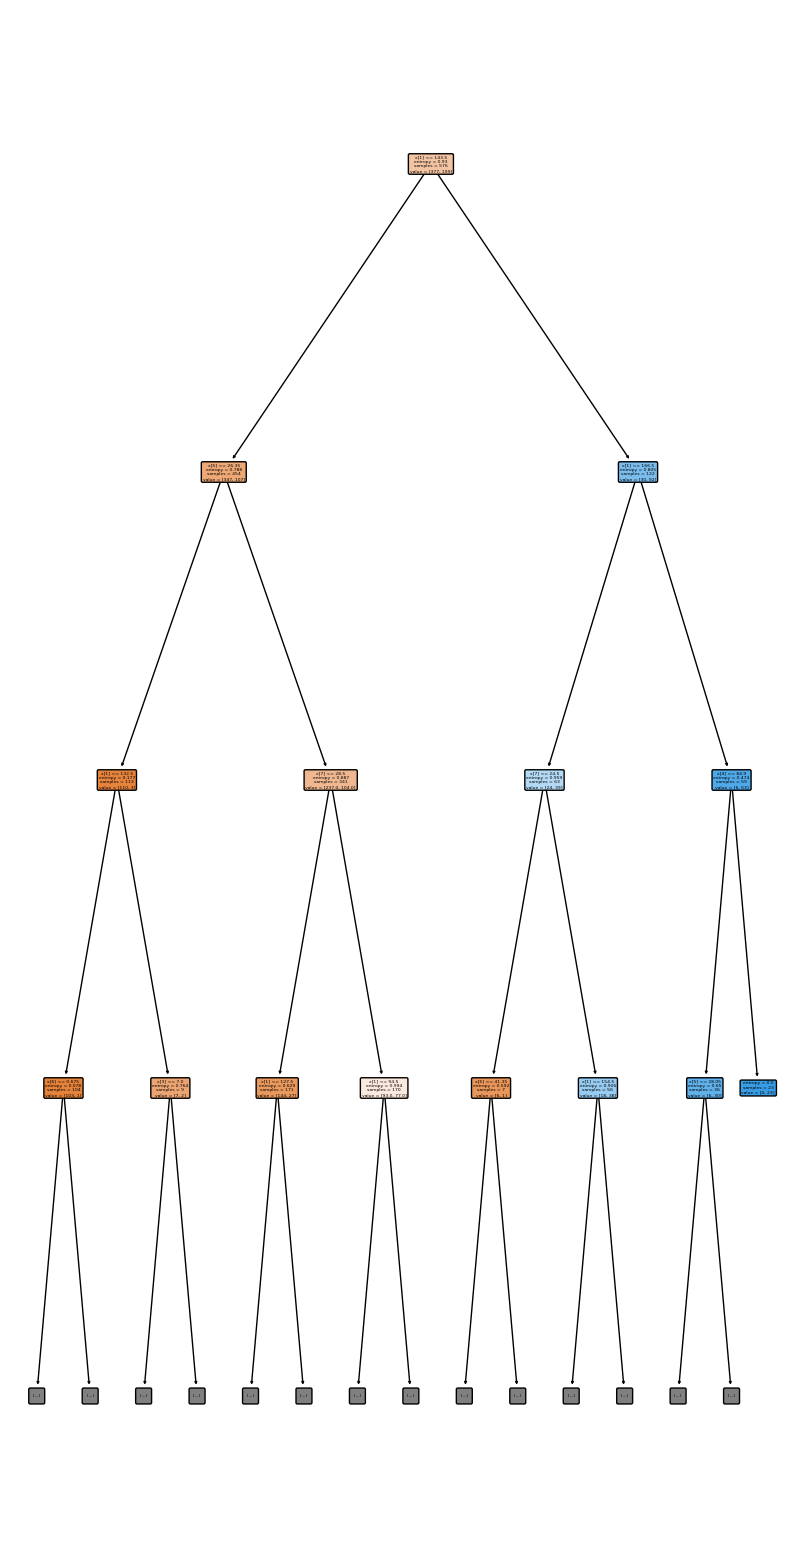

In [94]:
plt.figure(figsize=(10,20))
plt.title("TREE")
plot_tree(model, filled = True, max_depth = 3, rounded = True)
plt.show()

In [95]:
model = DecisionTreeClassifier(criterion =  'entropy', max_depth = 3, splitter = 'best')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [97]:
y_prediction = model.predict(X_test)
accuracy_score(y_prediction, y_test)

0.71875

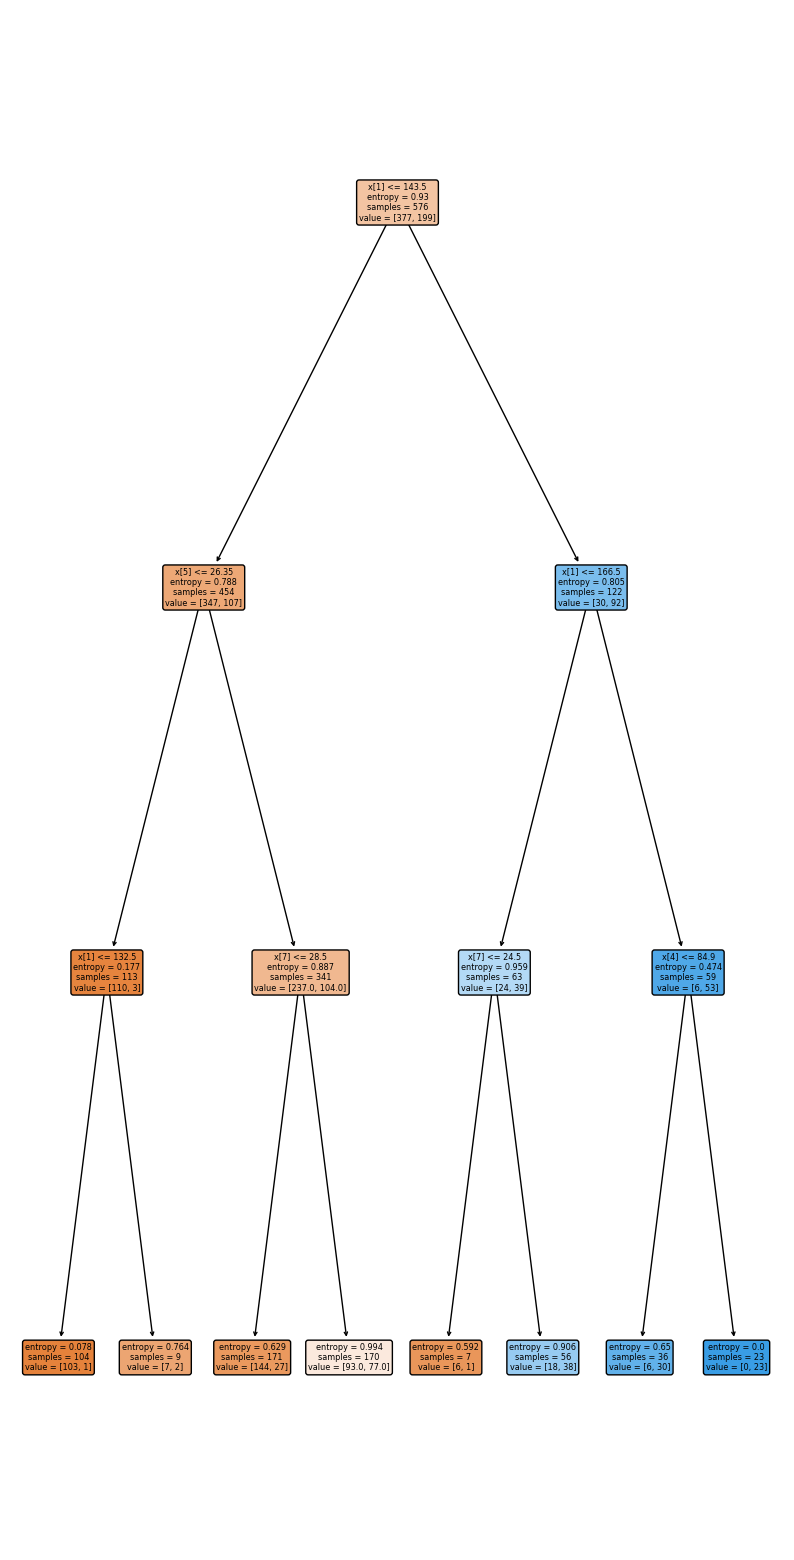

In [98]:
plt.figure(figsize=(10,20))
plt.title("TREE")
plot_tree(model, filled = True, rounded = True)
plt.show()

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [85]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [86]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [89]:
y_hat = model.predict(X_test)

In [90]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [91]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [92]:
accuracy = accuracy_score(y_test, y_hat)
print("the accuracy is : ",accuracy)

the accuracy is :  0.7135416666666666
